In [31]:
 import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [32]:
train=pd.read_csv('data.csv')

In [33]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [34]:
year= train["Year"]

In [35]:
msrp=pd.DataFrame(train['MSRP'])

In [36]:
msrp.describe()

,MSRP
count,1.191400e+04
mean,4.059474e+04
std,6.010910e+04
min,2.000000e+03
25%,2.100000e+04
50%,2.999500e+04
75%,4.223125e+04
max,2.065902e+06


In [37]:
pop=pd.DataFrame(train['Popularity'])

In [38]:
make = train["Make"]
make=make.astype("category")

In [39]:
jointDF = pd.concat([msrp,make],axis = 1).reindex(msrp.index)

In [40]:
filtered=train[train["MSRP"]==2000]
filtered.corr()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
Year,1.000000,0.082992,-0.142845,0.132175,0.239447,0.215642,0.003462,NaN
Engine HP,0.082992,1.000000,0.708591,0.118334,-0.601932,-0.721180,-0.070871,NaN
Engine Cylinders,-0.142845,0.708591,1.000000,0.001565,-0.652739,-0.726870,0.127867,NaN
Number of Doors,0.132175,0.118334,0.001565,1.000000,0.045652,-0.043404,-0.044905,NaN
highway MPG,0.239447,-0.601932,-0.652739,0.045652,1.000000,0.935552,-0.082751,NaN
city mpg,0.215642,-0.721180,-0.726870,-0.043404,0.935552,1.000000,-0.049168,NaN
Popularity,0.003462,-0.070871,0.127867,-0.044905,-0.082751,-0.049168,1.000000,NaN
MSRP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Graphical representation for the msrp=2000 data

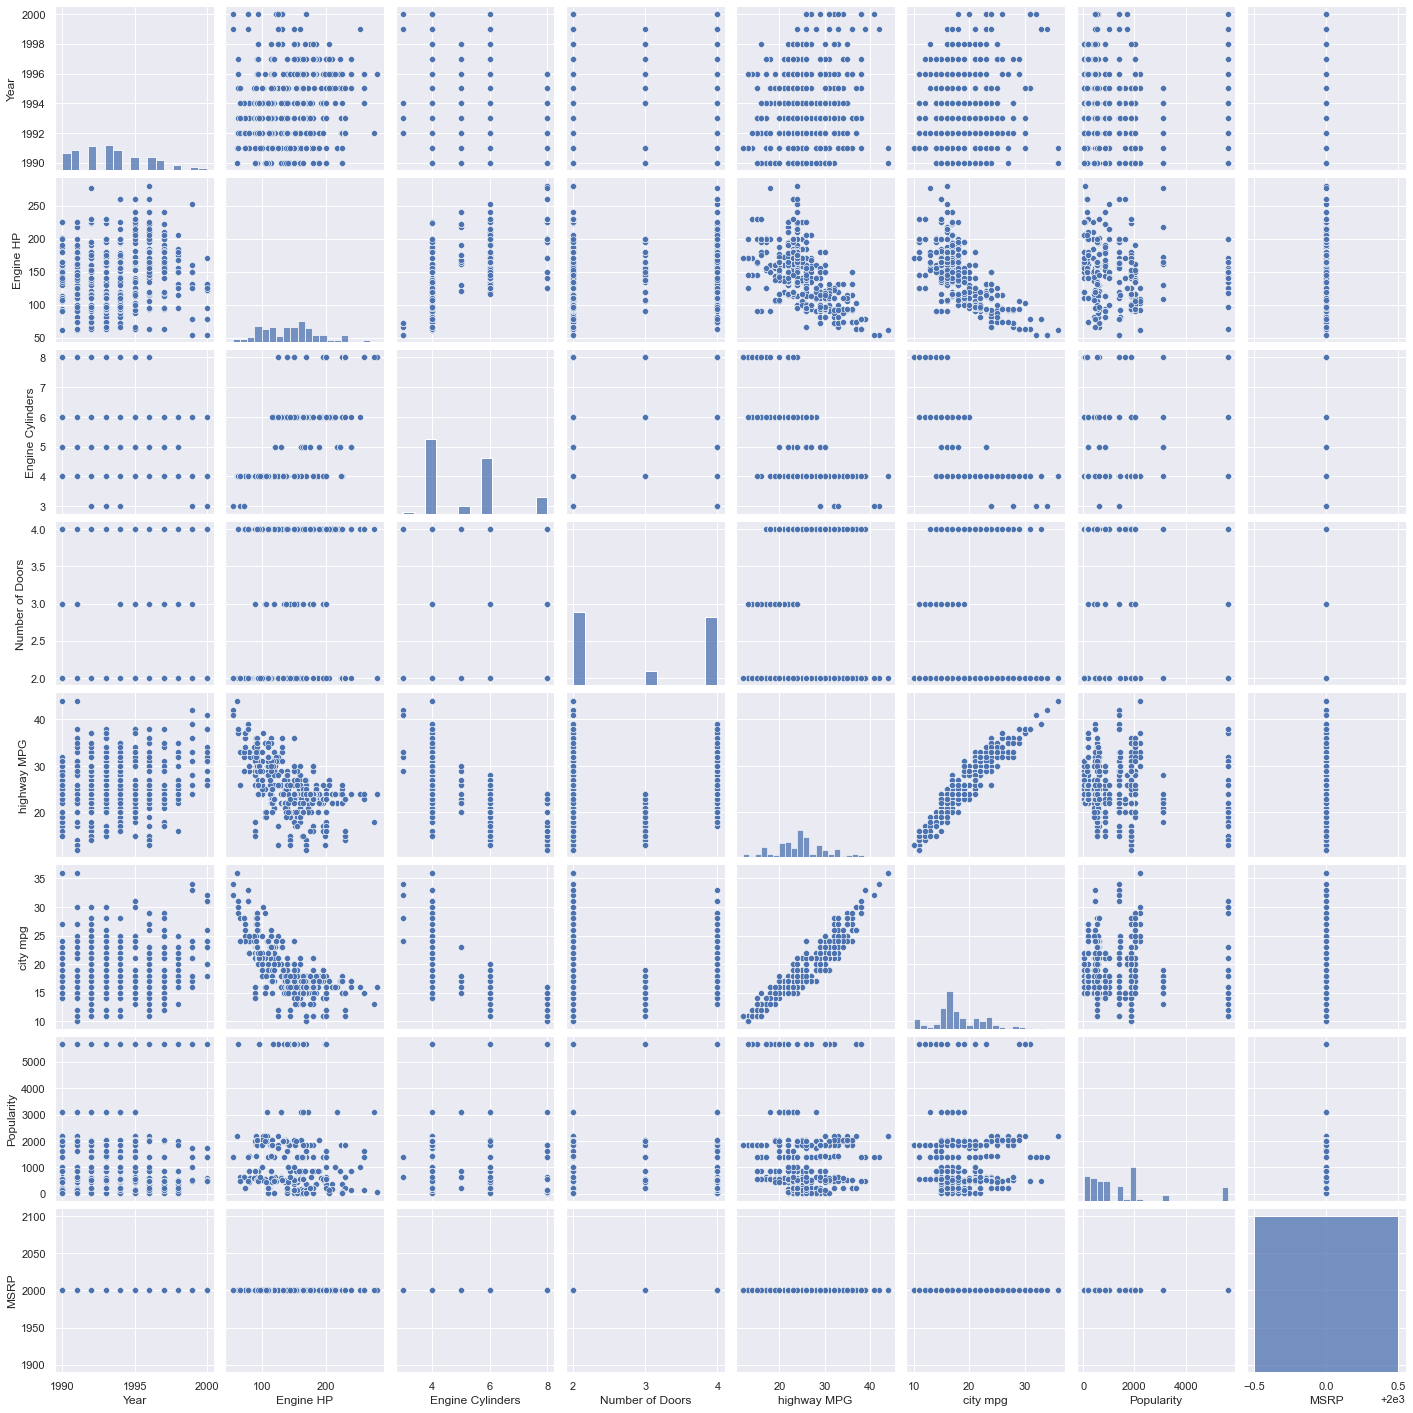

In [41]:
sb.pairplot(data = filtered)

In [42]:
train_filtered=train.drop(filtered.index)
train_filtered.shape

(10878, 16)

In [43]:
make_filtered=pd.DataFrame(train_filtered["Make"])
make_filtered=make_filtered.astype("category")

In [44]:
msrp_filtered=pd.DataFrame(train_filtered["MSRP"])
jointDF3 = pd.concat([msrp_filtered,make_filtered],axis = 1).reindex(msrp_filtered.index)

In [45]:
filtered2=train[train["MSRP"]<=10000]
train_filtered2=train.drop(filtered2.index)
msrp_filtered2=pd.DataFrame(train_filtered2["MSRP"])
make_filtered2=pd.DataFrame(train_filtered2["Make"])
make_filtered2=make_filtered2.astype("category")
jointDF4 = pd.concat([msrp_filtered2,make_filtered2],axis = 1).reindex(msrp_filtered2.index)
filtered2.corr()


,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
Year,1.000000,0.276673,0.100355,0.063776,-0.019274,-0.024254,0.050143,0.362012
Engine HP,0.276673,1.000000,0.749000,-0.000094,-0.572446,-0.678374,0.055128,0.505197
Engine Cylinders,0.100355,0.749000,1.000000,-0.025426,-0.660333,-0.733777,0.228282,0.339988
Number of Doors,0.063776,-0.000094,-0.025426,1.000000,0.091020,0.016781,-0.135181,-0.171086
highway MPG,-0.019274,-0.572446,-0.660333,0.091020,1.000000,0.936153,-0.182349,-0.204993
city mpg,-0.024254,-0.678374,-0.733777,0.016781,0.936153,1.000000,-0.152914,-0.213934
Popularity,0.050143,0.055128,0.228282,-0.135181,-0.182349,-0.152914,1.000000,0.091092
MSRP,0.362012,0.505197,0.339988,-0.171086,-0.204993,-0.213934,0.091092,1.000000


In [46]:
filtered2["Year"].value_counts()

1993    209
1992    177
1997    171
1994    162
1991    152
1998    152
1995    134
1996    129
1990    123
1999    119
2000    117
2001      2
Name: Year, dtype: int64

In [47]:
filtered["Year"].value_counts()

1993    171
1992    161
1991    137
1994    134
1990    117
1995     91
1996     90
1997     68
1998     32
1999     20
2000     15
Name: Year, dtype: int64

In [48]:
manual=train_filtered2[train_filtered2["Transmission Type"]=="MANUAL"]
manual["MSRP"].describe()

count      1928.000000
mean      39350.082988
std       44828.323552
min       10135.000000
25%       18893.750000
50%       24790.000000
75%       36875.000000
max      440000.000000
Name: MSRP, dtype: float64

In [49]:
automatic=train_filtered2[train_filtered2["Transmission Type"]=="AUTOMATIC"]
automatic["MSRP"].describe()

count    7.645000e+03
mean     4.425761e+04
std      4.844225e+04
min      1.094900e+04
25%      2.625000e+04
50%      3.392000e+04
75%      4.492500e+04
max      1.382750e+06
Name: MSRP, dtype: float64

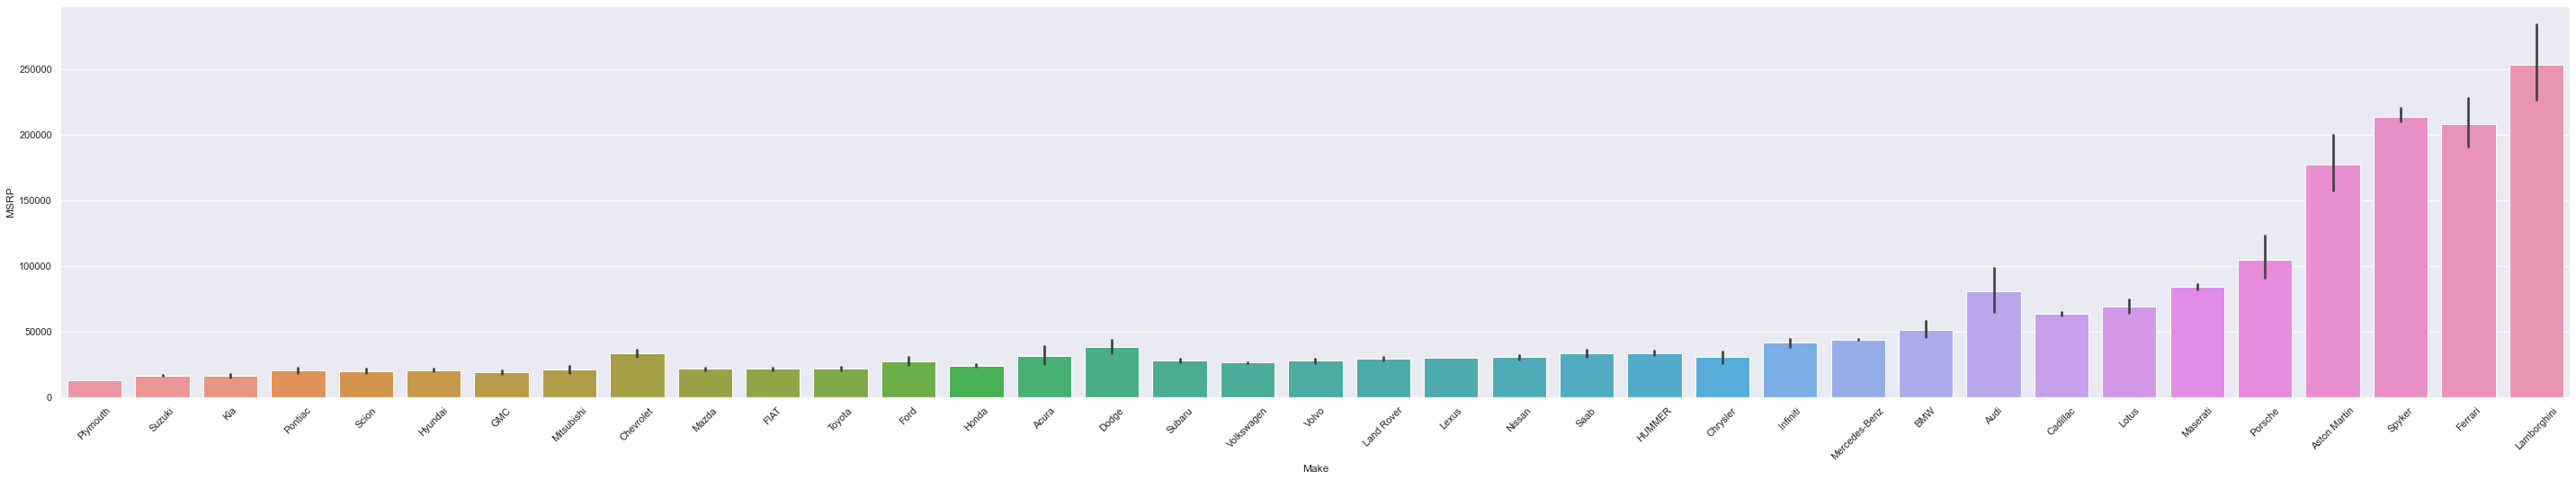

In [50]:
f = plt.figure(figsize=(50, 8))
sb.barplot(x = 'Make', y = 'MSRP', data = manual, 
           order = manual.groupby('Make')['MSRP'].median().sort_values().index)

# Tilt the x-axis labels for better readability
plt.xticks(rotation=45);

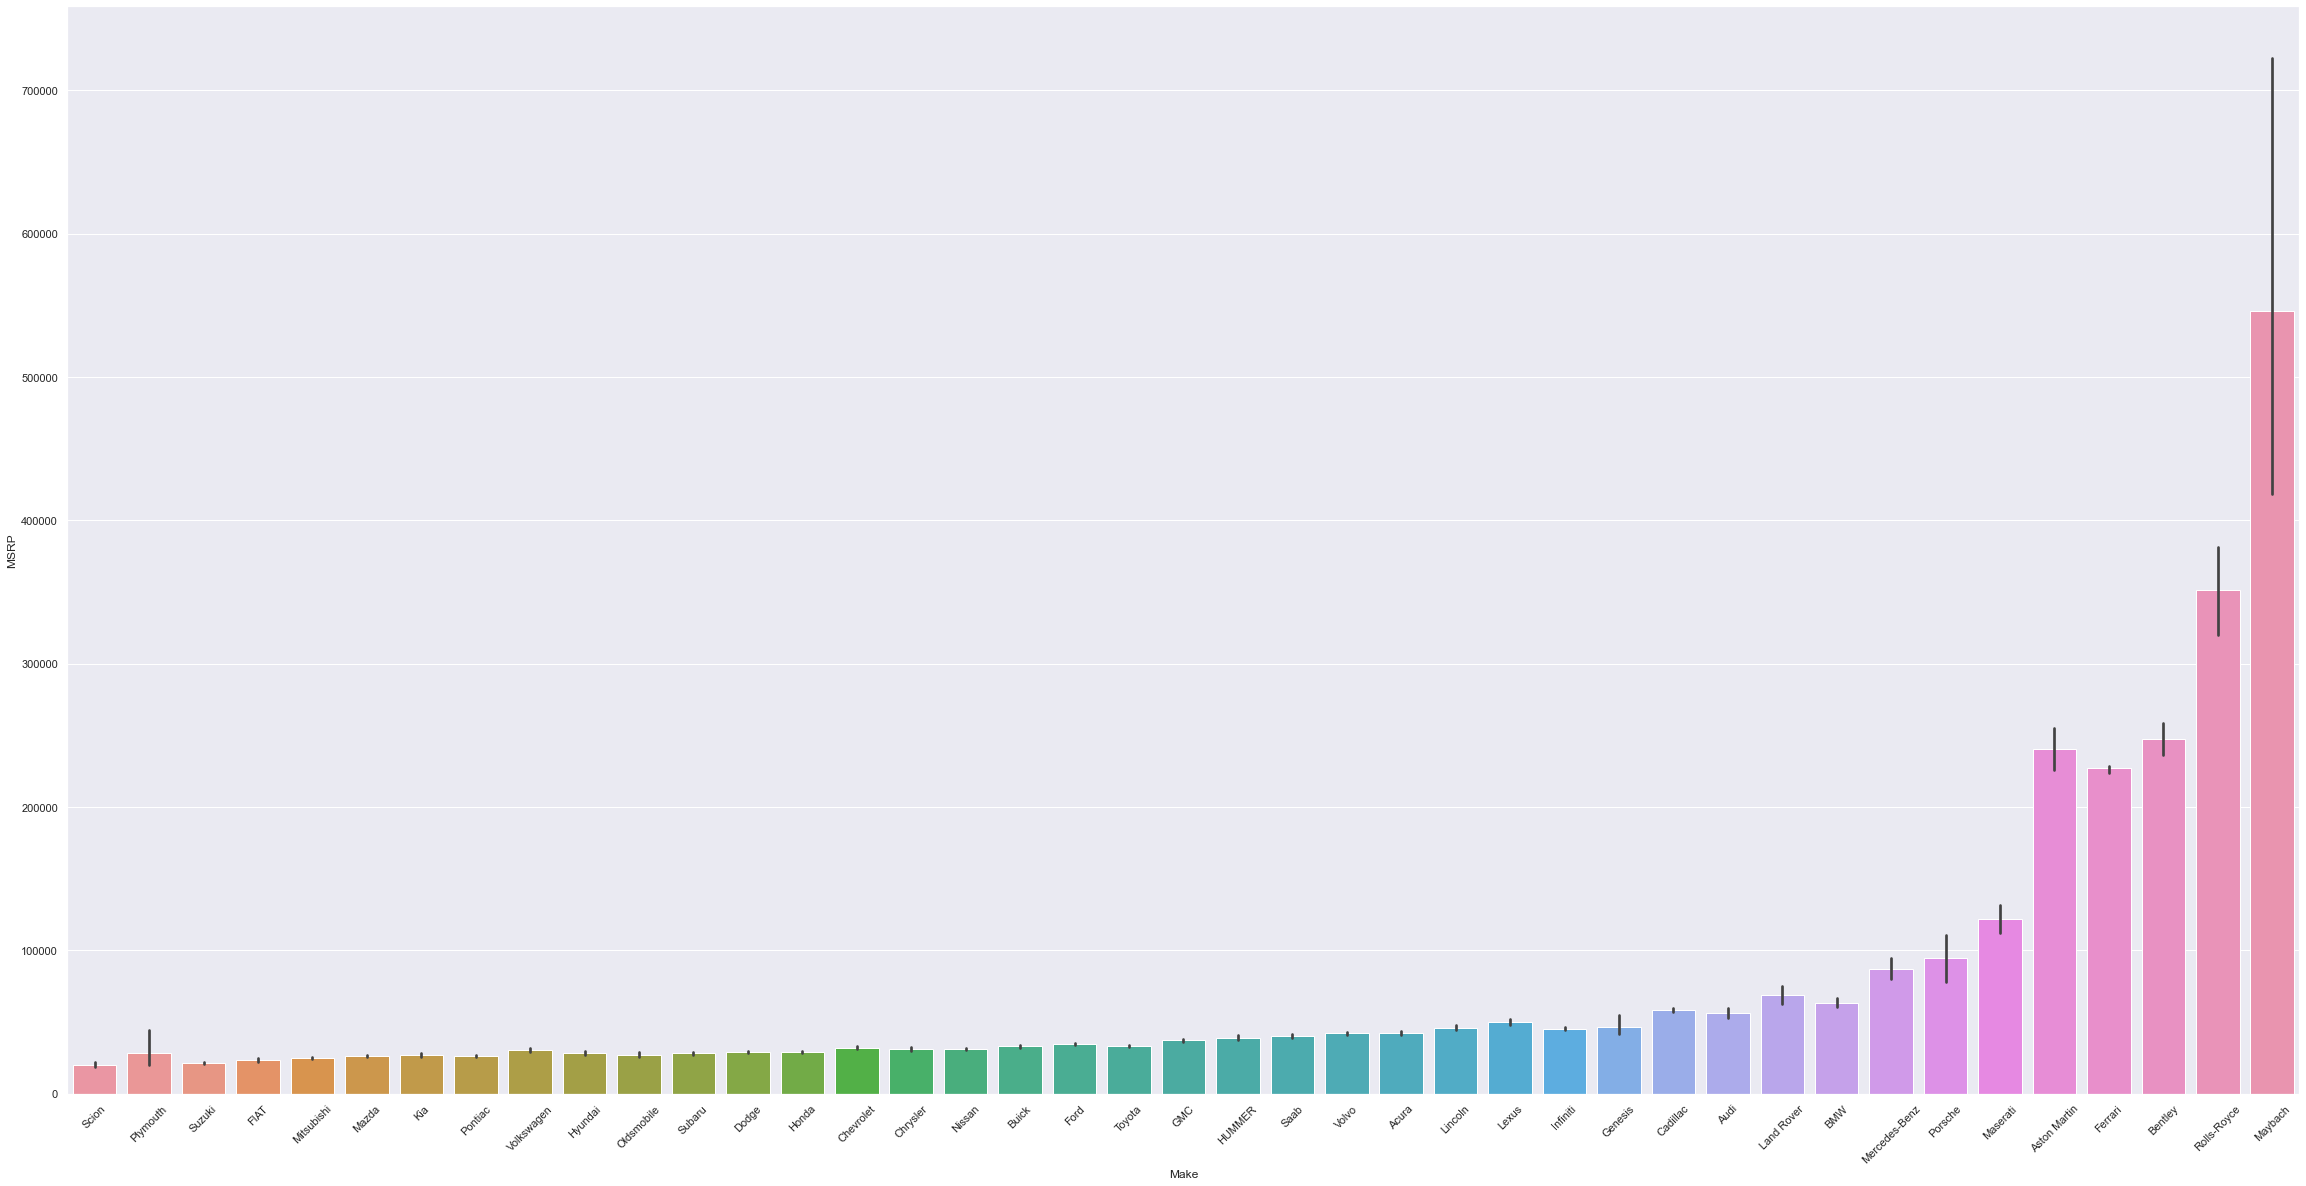

In [51]:
f = plt.figure(figsize=(40, 20))
sb.barplot(x = 'Make', y = 'MSRP', data = automatic, 
           order = automatic.groupby('Make')['MSRP'].median().sort_values().index)

# Tilt the x-axis labels for better readability
plt.xticks(rotation=45);

Plot of the count of Make from original data set

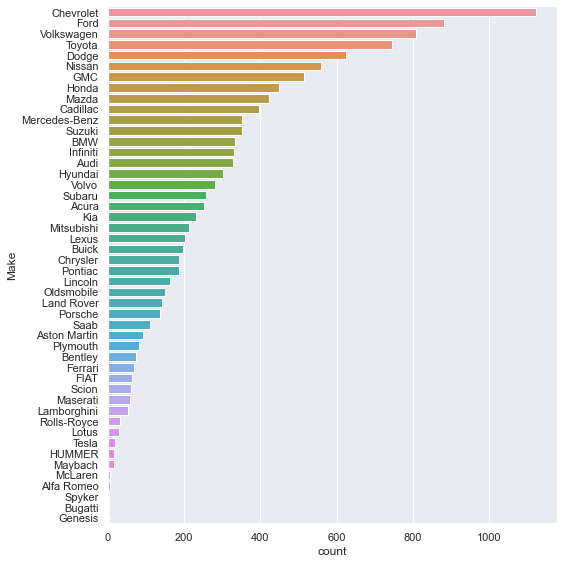

In [52]:
make=pd.DataFrame(train['Make'])
sb.catplot(y = 'Make', data = jointDF, 
           kind = "count", 
           height = 8, 
           order = jointDF['Make'].value_counts().index)

Plot of the count of Make data after filtering out the MSRP 2000 data

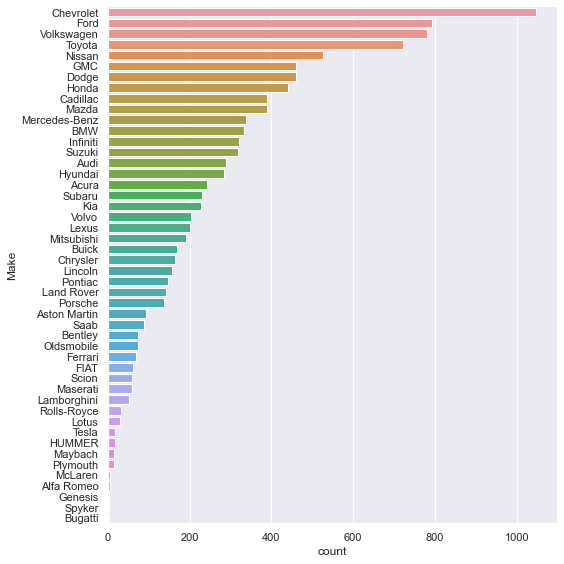

In [53]:
sb.catplot(y = 'Make', data = jointDF3, 
           kind = "count", 
           height = 8, 
           order = jointDF3['Make'].value_counts().index)

Plot of the count of Make data after filtering the MSRP in the range of above 2000 and less equal to 10000

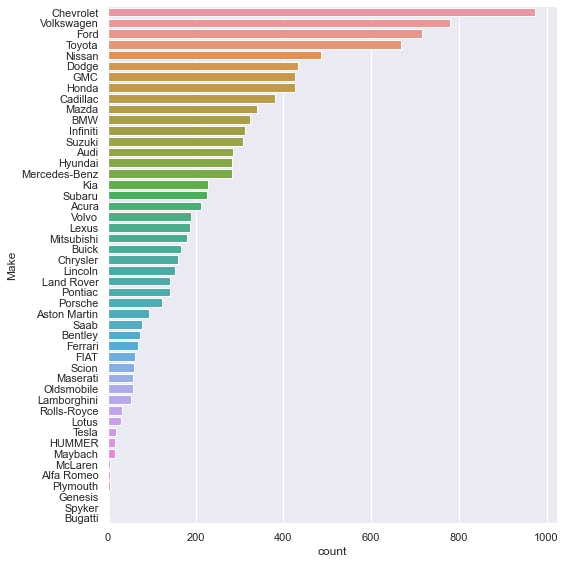

In [54]:
sb.catplot(y = 'Make', data = jointDF4, 
           kind = "count", 
           height = 8, 
           order = jointDF4['Make'].value_counts().index)

Original Data plot of MSRP against the make

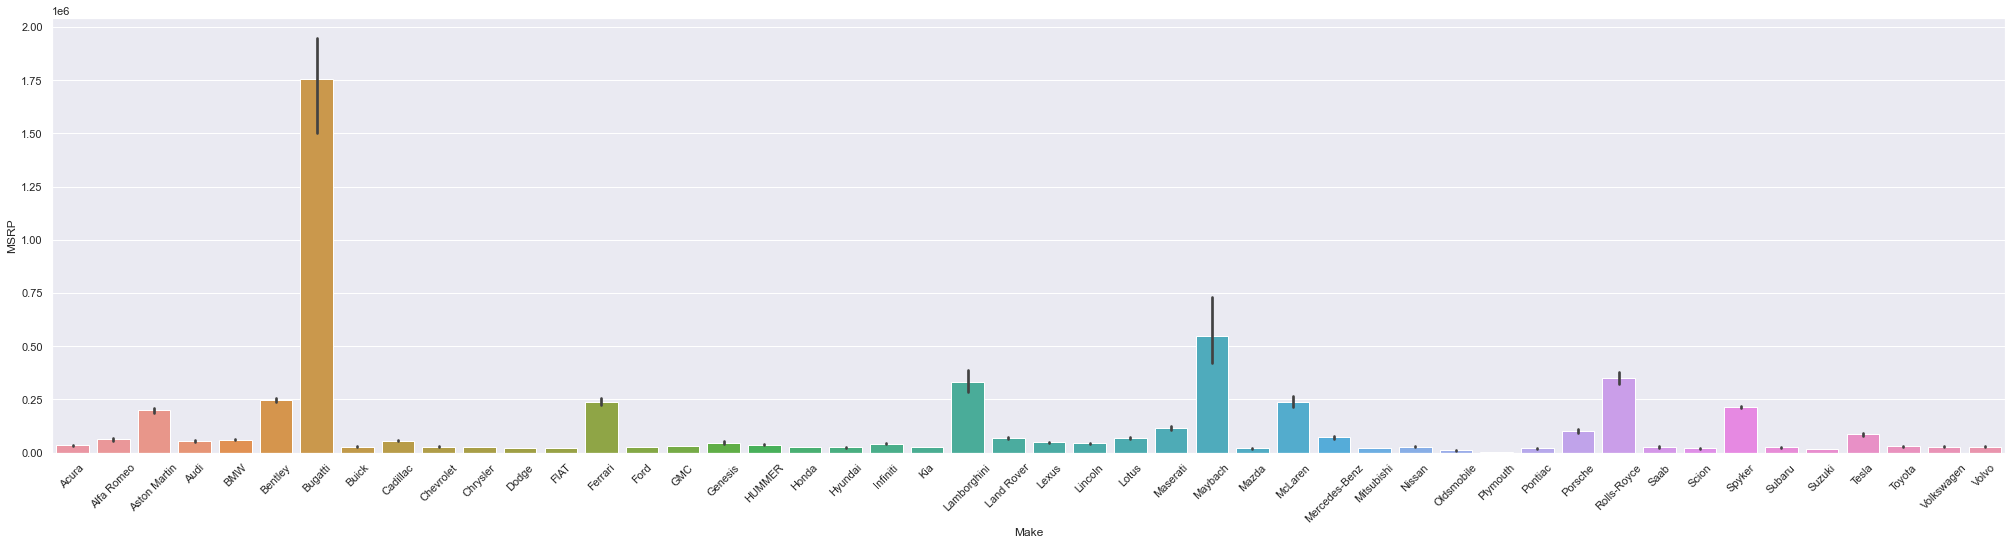

In [55]:
f = plt.figure(figsize=(35, 8))
sb.barplot(x = 'Make', y = 'MSRP', data = jointDF)            
# Tilt the x-axis labels for better readability
plt.xticks(rotation=45);

Plot of MSRP against the Make after filtering out the data whose MSRP is 2000

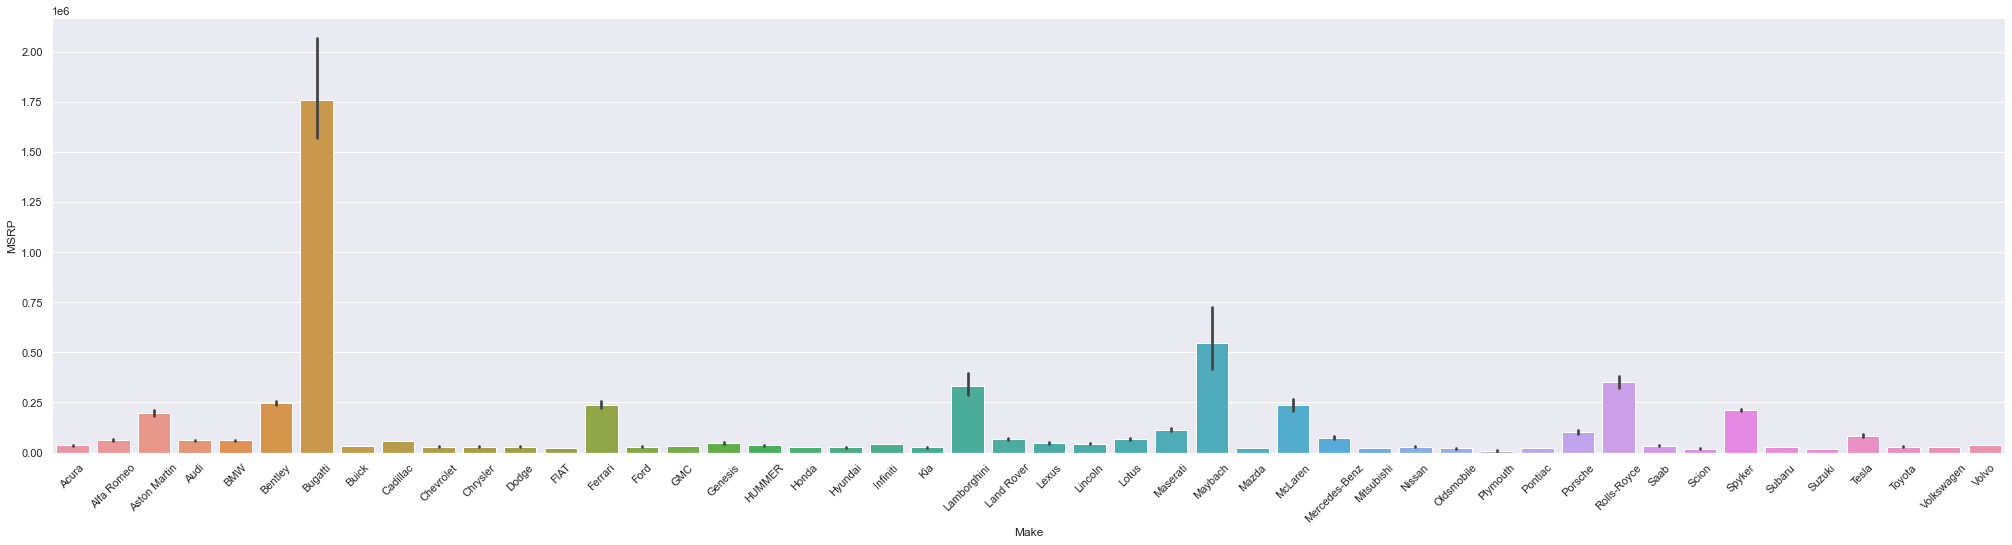

In [56]:
f = plt.figure(figsize=(35, 8))
sb.barplot(x = 'Make', y = 'MSRP', data = jointDF3) 
# Tilt the x-axis labels for better readability
plt.xticks(rotation=45);

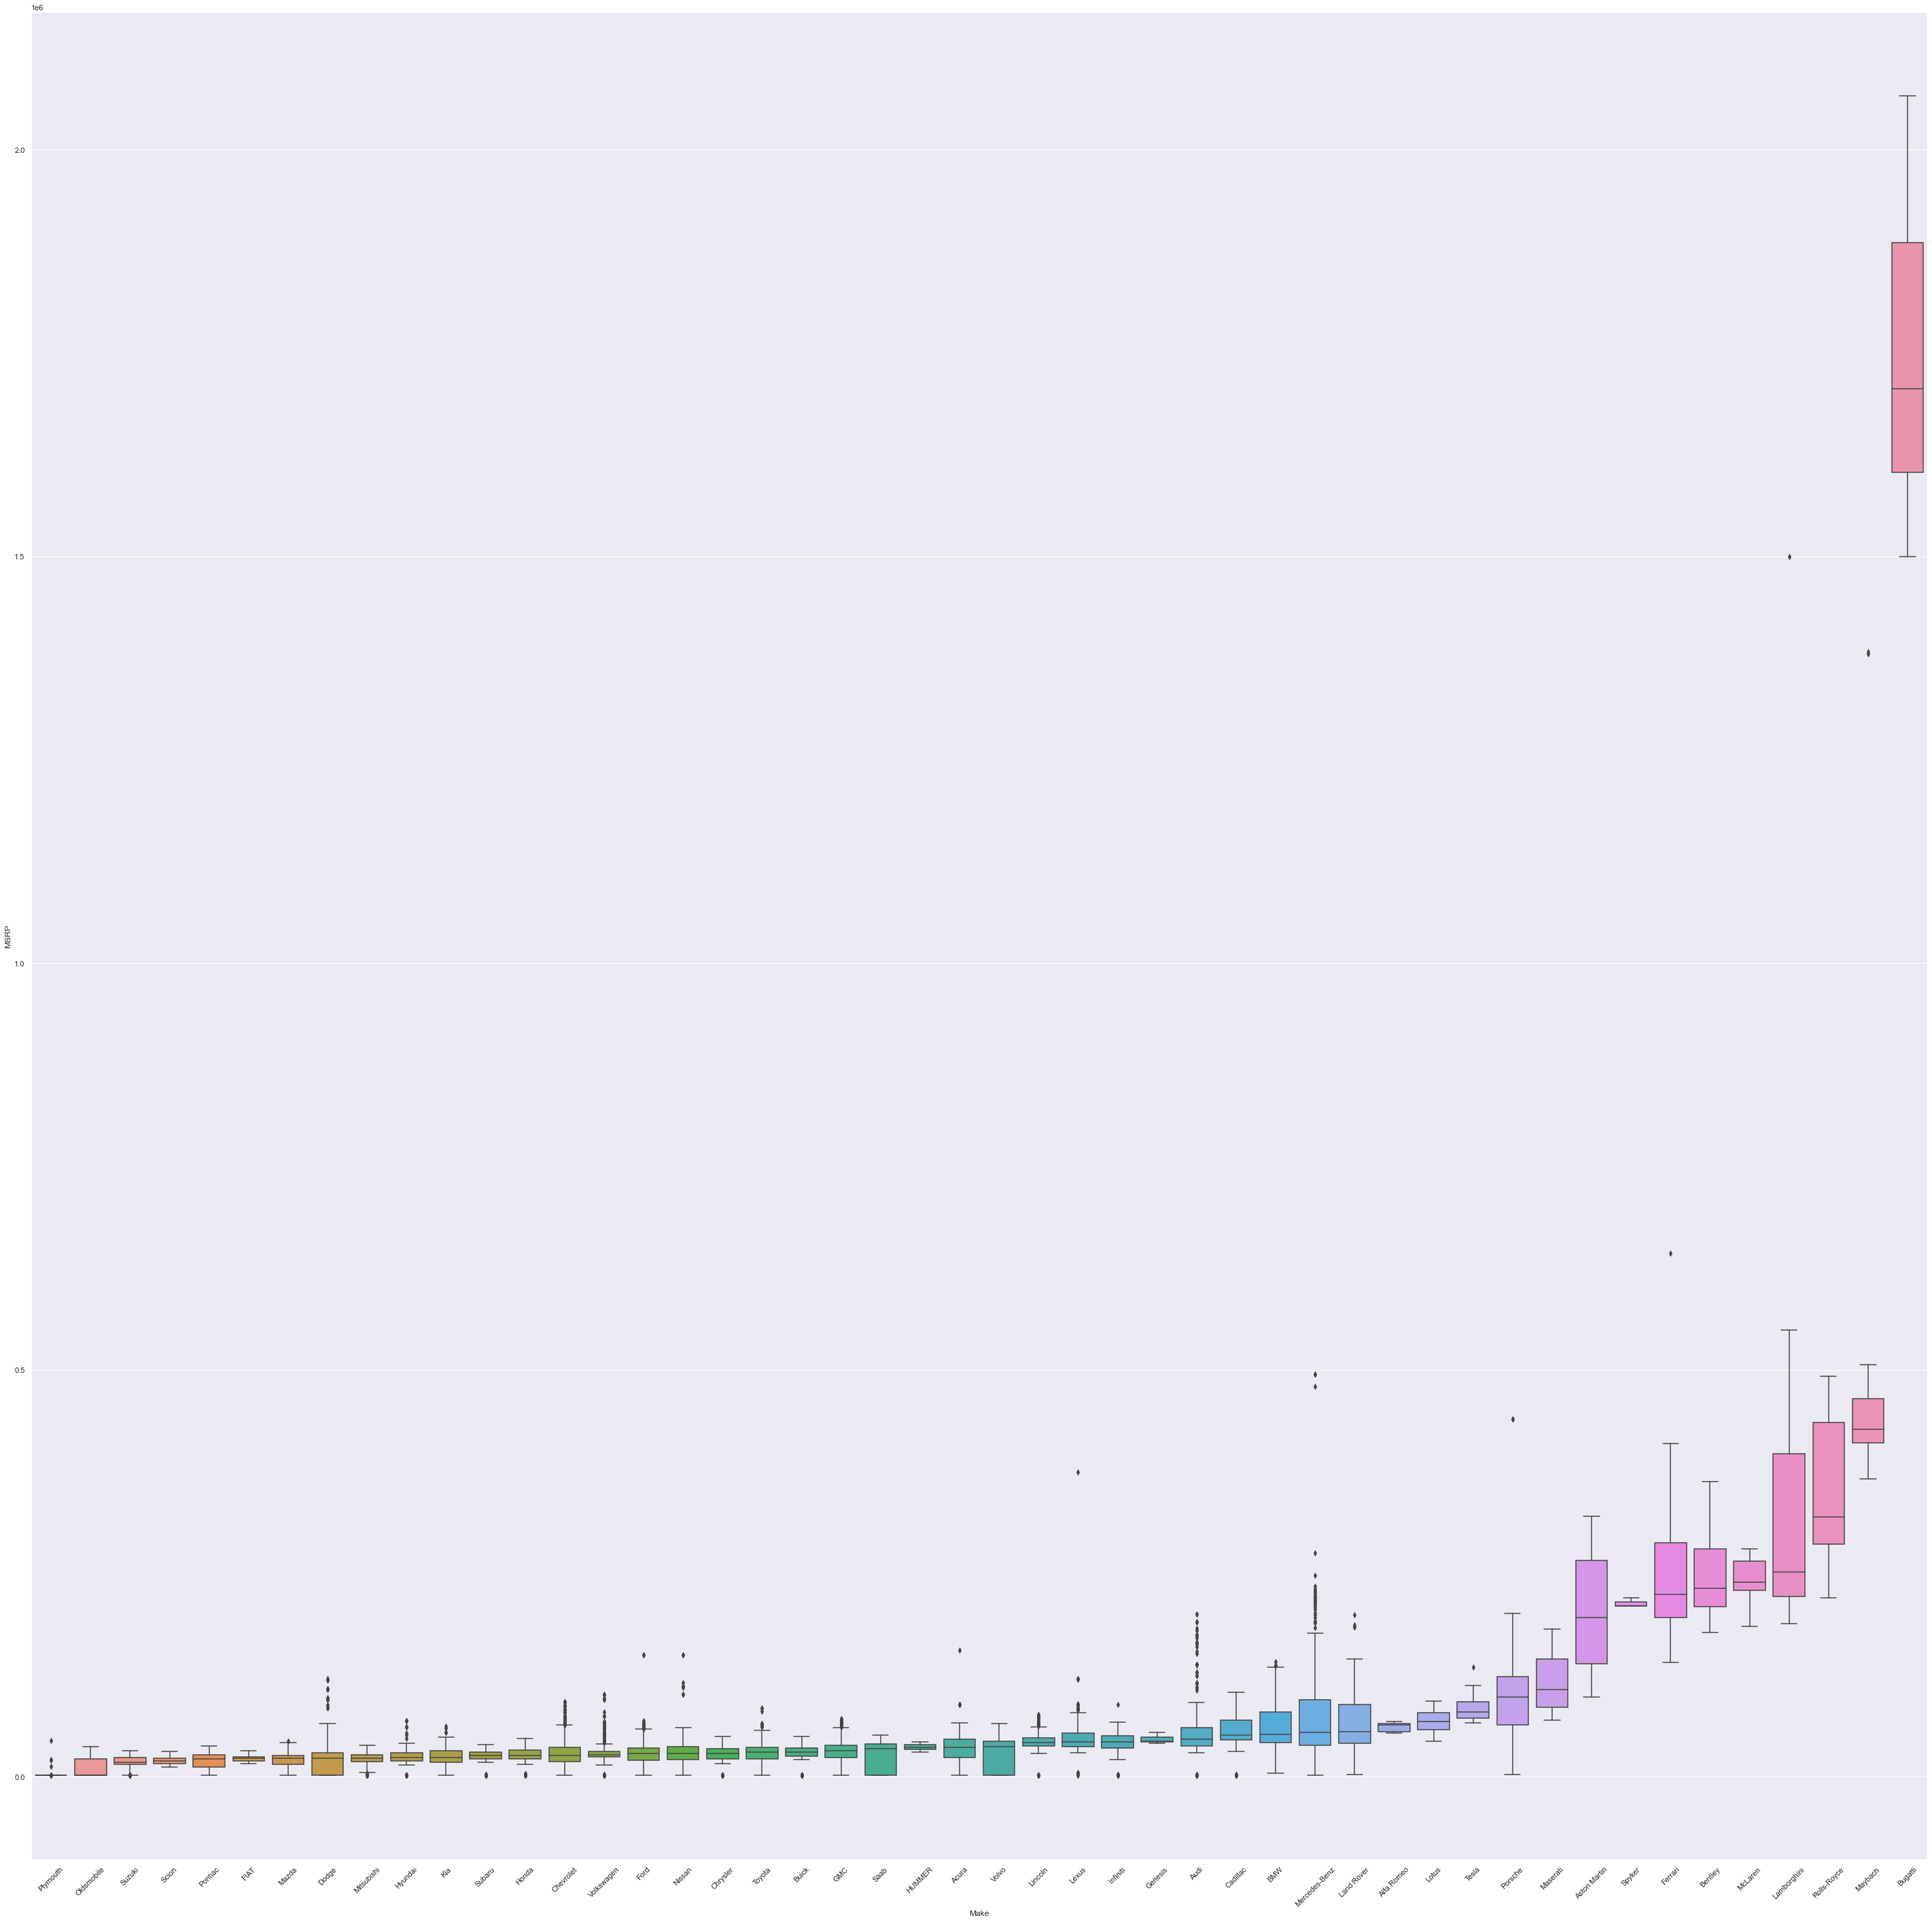

In [100]:
f = plt.figure(figsize=(50,50))
sb.boxplot(x = 'Make', y = 'MSRP', data = jointDF, 
           order = jointDF.groupby('Make')['MSRP'].median().sort_values().index)

# Tilt the x-axis labels for better readability
plt.xticks(rotation=45);

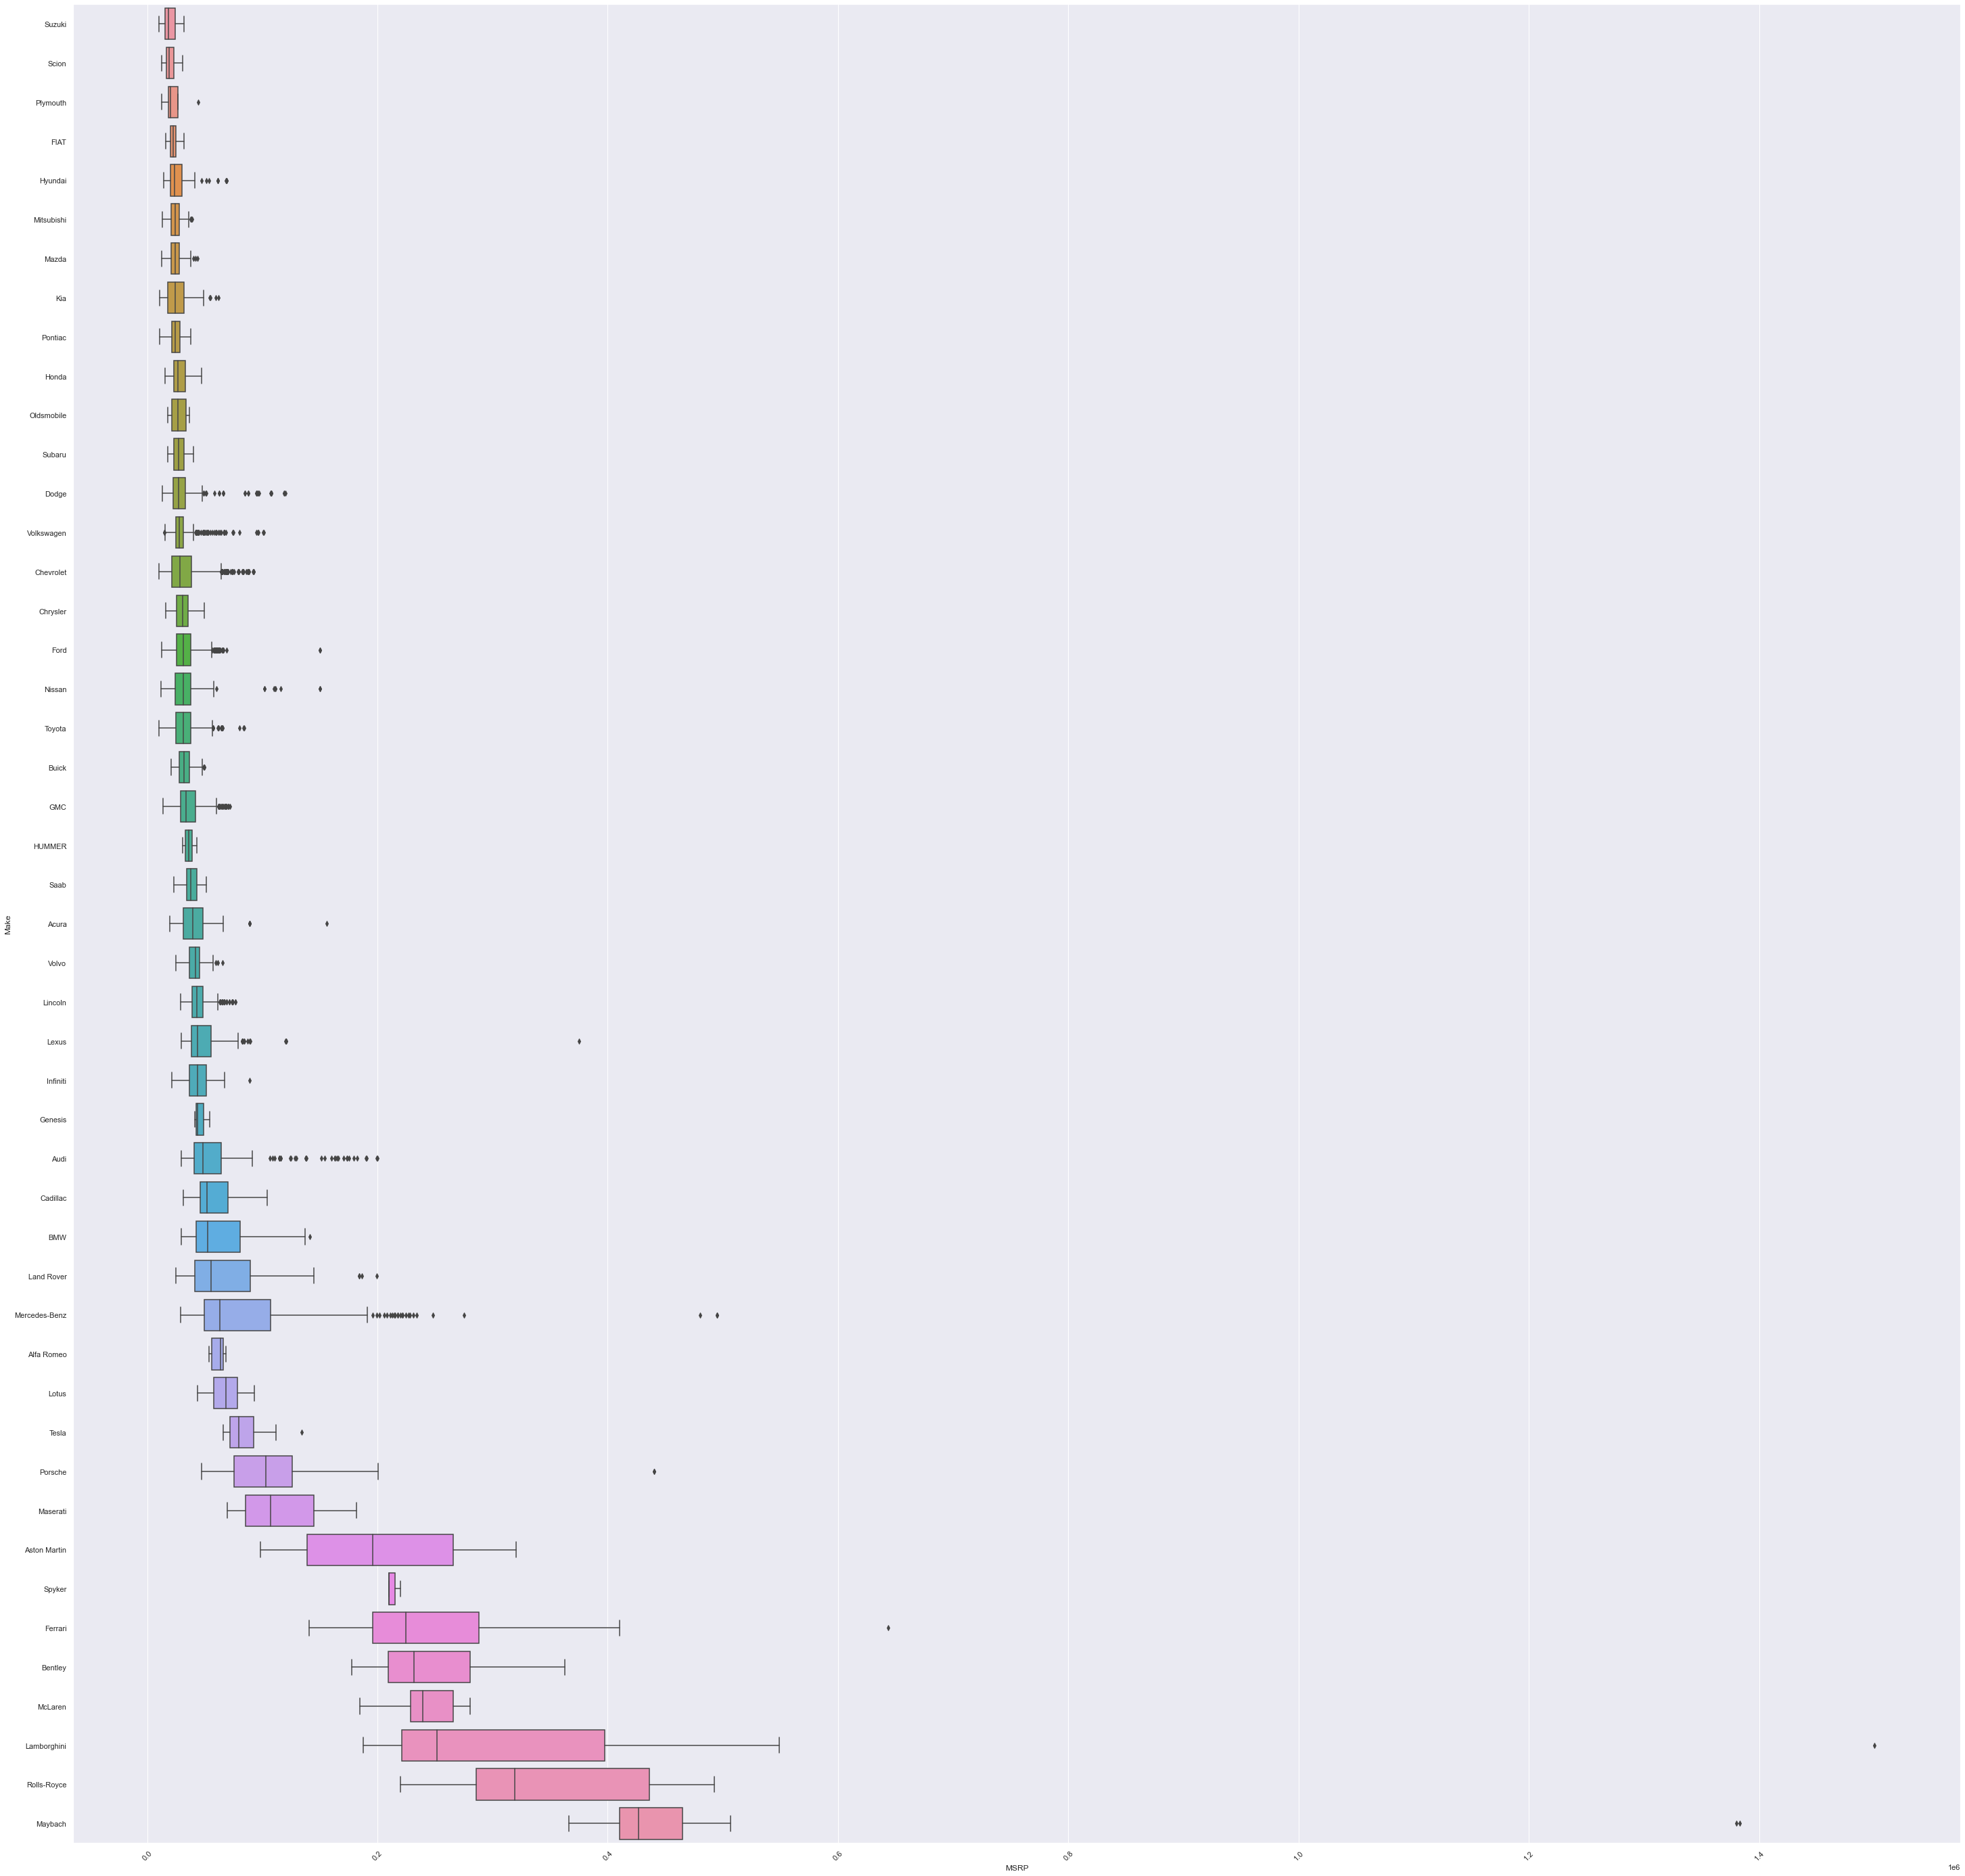

In [111]:
f = plt.figure(figsize=(50, 50))
sb.boxplot(x = 'MSRP', y = 'Make', data = train_filter_final, orient="h",
           order = train_filter_final.groupby('Make')['MSRP'].median().sort_values().index)

# Tilt the x-axis labels for better readability
plt.xticks(rotation=45);

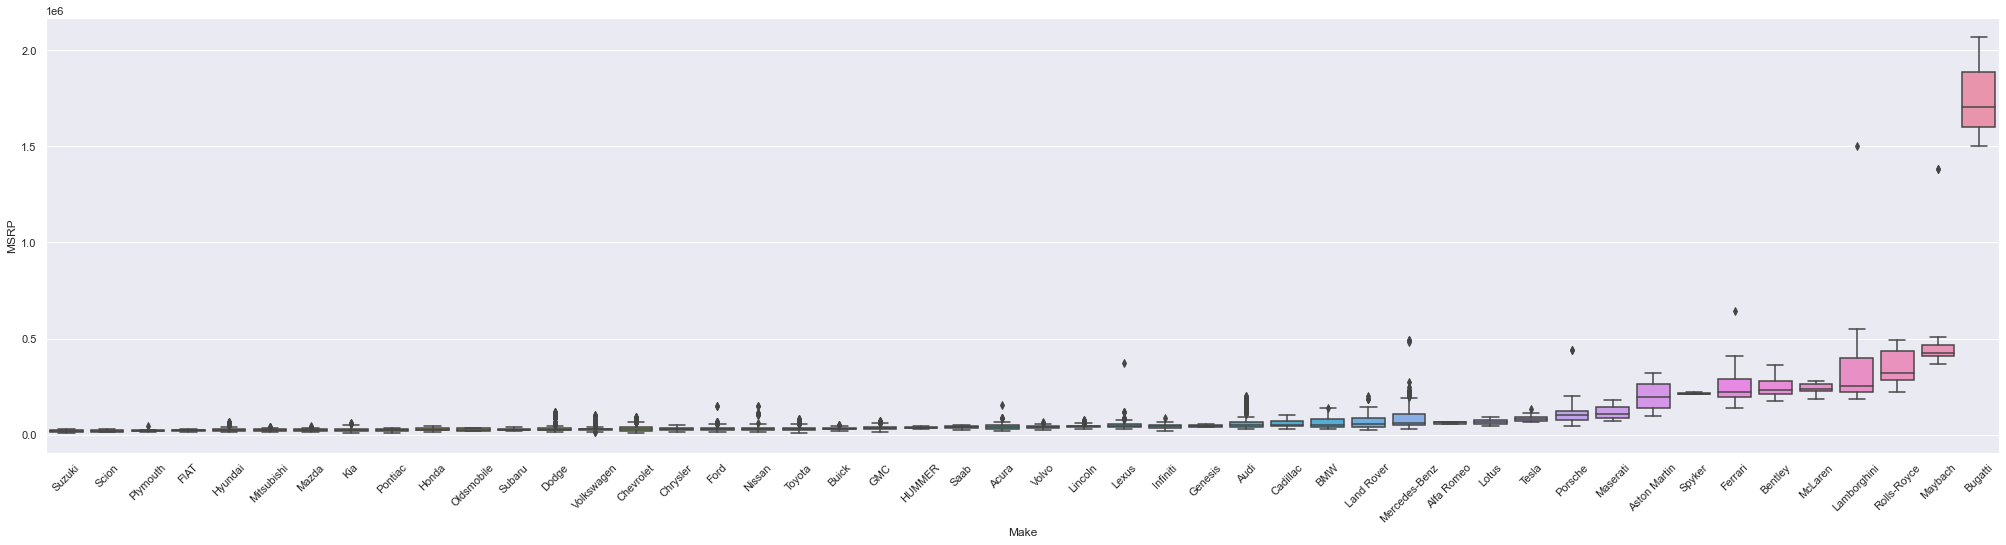

In [59]:
f = plt.figure(figsize=(35, 8))
sb.boxplot(x = 'Make', y = 'MSRP', data = jointDF4, 
           order = jointDF4.groupby('Make')['MSRP'].median().sort_values().index)

# Tilt the x-axis labels for better readability
plt.xticks(rotation=45);

In [60]:
mark =  pd.DataFrame(train["Market Category"])
train_filterss=train.drop(mark,axis=1)

In [61]:
train_filterss.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [102]:
bugatti=train_filtered2[train_filtered2["Make"]=="Bugatti"]
bugatti.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,3.000000,3.0,3.0,3.0,3.0,3.0,3.0,3.000000e+00
mean,2008.333333,1001.0,16.0,2.0,14.0,8.0,820.0,1.757224e+06
std,0.577350,0.0,0.0,0.0,0.0,0.0,0.0,2.864384e+05
min,2008.000000,1001.0,16.0,2.0,14.0,8.0,820.0,1.500000e+06
25%,2008.000000,1001.0,16.0,2.0,14.0,8.0,820.0,1.602884e+06
50%,2008.000000,1001.0,16.0,2.0,14.0,8.0,820.0,1.705769e+06
75%,2008.500000,1001.0,16.0,2.0,14.0,8.0,820.0,1.885836e+06
max,2009.000000,1001.0,16.0,2.0,14.0,8.0,820.0,2.065902e+06


In [103]:
anomaly=train_filtered2[train_filtered2["Make"]=="Bugatti"]
train_filter_final=train_filtered2.drop(anomaly.index)
train_filter_final.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,10264.000000,10195.000000,10237.000000,10258.000000,10264.000000,10264.000000,10264.000000,1.026400e+04
mean,2012.886107,262.549485,5.638468,3.522714,27.178585,20.138932,1558.406469,4.622533e+04
std,4.468342,109.101432,1.812934,0.838598,9.187438,9.478561,1420.780912,5.523043e+04
min,1994.000000,66.000000,0.000000,2.000000,12.000000,7.000000,2.000000,1.013500e+04
25%,2010.000000,181.000000,4.000000,3.000000,22.000000,16.000000,549.000000,2.490000e+04
50%,2015.000000,250.000000,6.000000,4.000000,26.000000,19.000000,1385.000000,3.259900e+04
75%,2016.000000,308.000000,6.000000,4.000000,31.000000,22.000000,2009.000000,4.500375e+04
max,2017.000000,750.000000,12.000000,4.000000,354.000000,137.000000,5657.000000,1.500000e+06


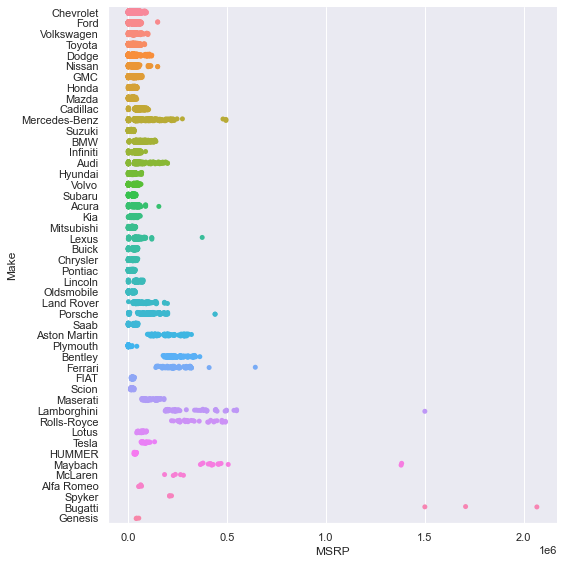

In [64]:
sb.catplot(y = 'Make', data = jointDF, 
           x="MSRP", 
           height = 8, 
           order = jointDF['Make'].value_counts().index)

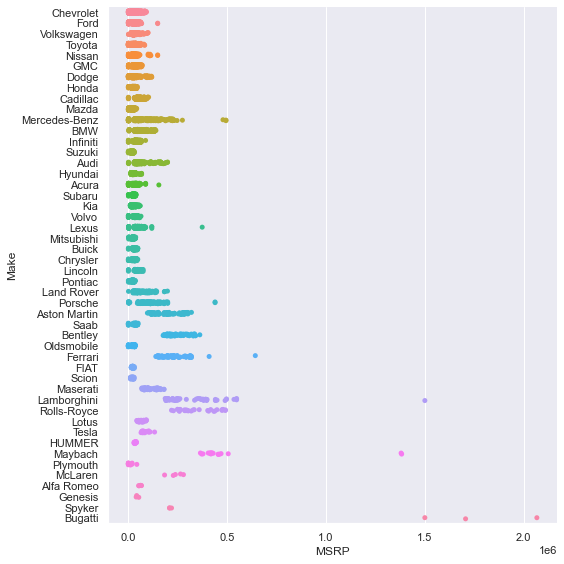

In [65]:
sb.catplot(y = 'Make', data = jointDF3, 
           x="MSRP", 
           height = 8, 
           order = jointDF3['Make'].value_counts().index)

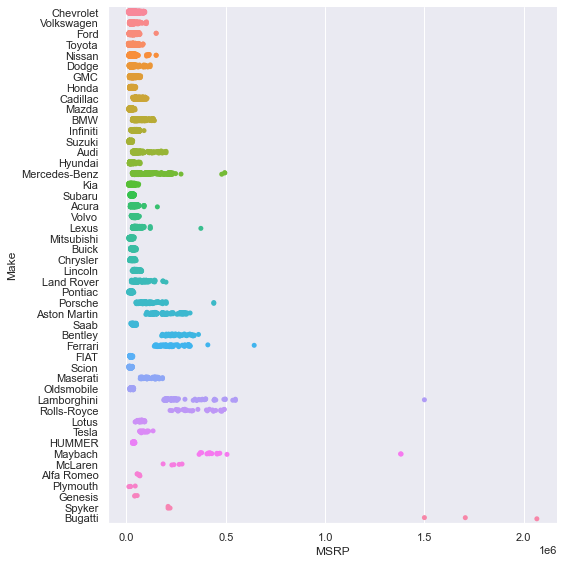

In [66]:
sb.catplot(y = 'Make', data = jointDF4, 
           x="MSRP", 
           height = 8, 
           order = jointDF4['Make'].value_counts().index)

filter out bugatti. Use the top 4 make to do a correlation with the msrp.

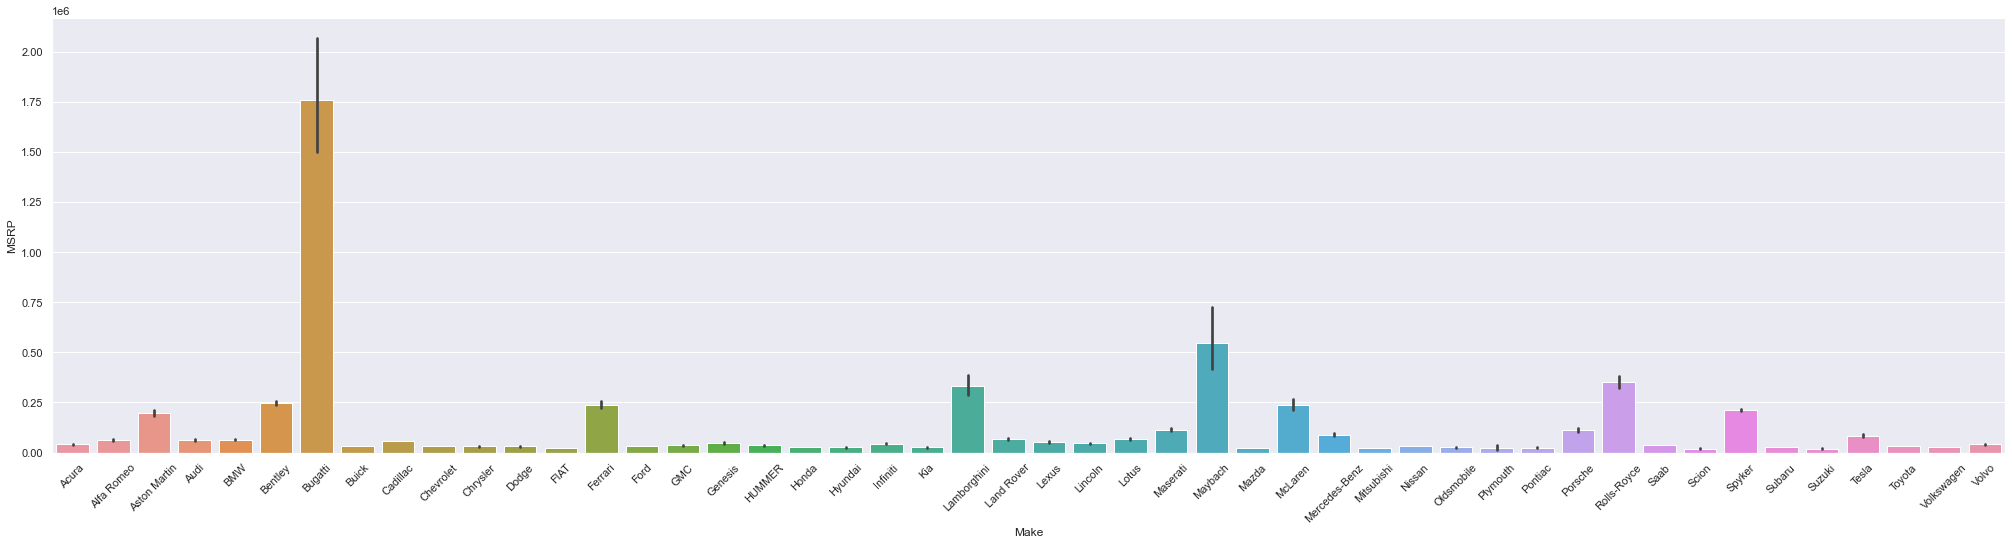

In [67]:
f = plt.figure(figsize=(35, 8))
sb.barplot(x = 'Make', y = 'MSRP', data = jointDF4) 
           #order = jointDF.groupby('Make')['MSRP'].median().sort_values().index)

# Tilt the x-axis labels for better readability
plt.xticks(rotation=45);


do filter_rule = (2000 == train_set["MSRP"])
filter_set = train_set[filter_rule]
then display
display year, make, msrp
replot rest of data
do random 80:20
which feature affect price most(boxplot, regression etc)


In [68]:
jointDF2 = pd.concat([msrp,year],axis = 1).reindex(msrp.index)


(array([   0.,  500., 1000., 1500., 2000., 2500.]), [])

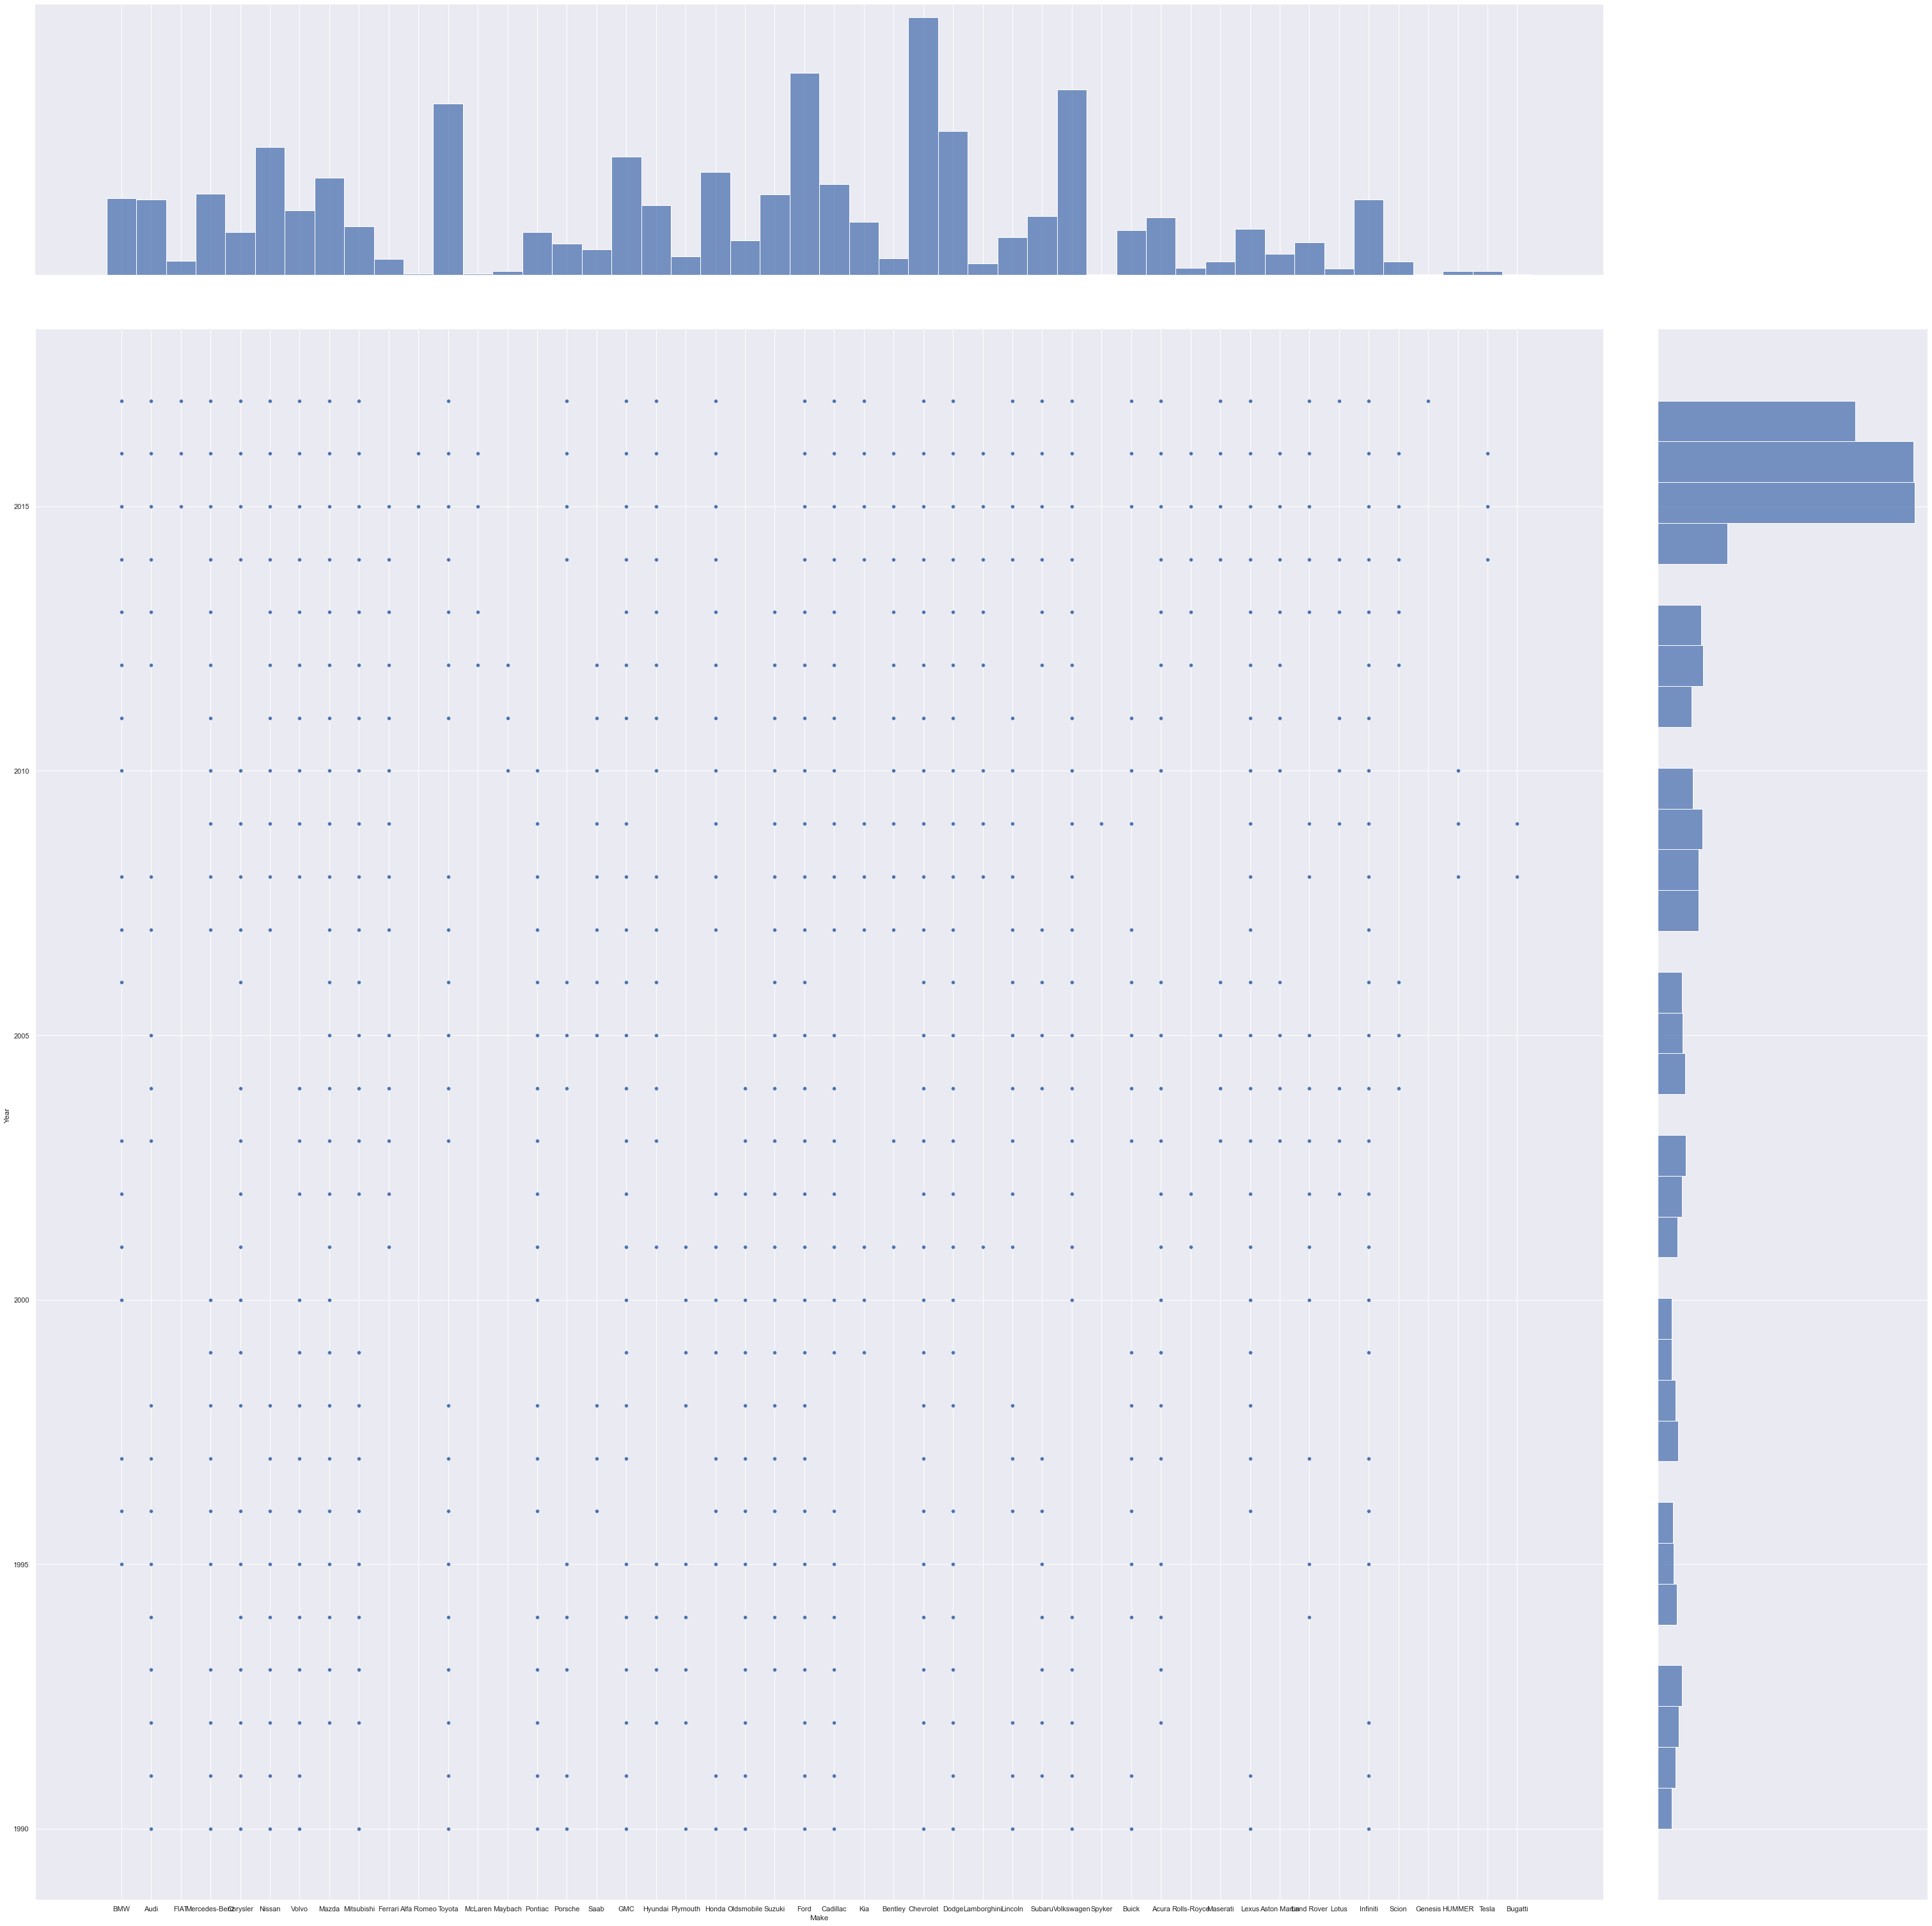

In [69]:
jointDF5 = pd.concat([year,make], axis = 1).reindex(year.index)
sb.jointplot(x = "Make", y = "Year", data = jointDF5, height =42)
plt.xticks(rotation=45)

In [70]:
chevrolet=train_filterss[train_filterss["Make"]=="Chevrolet"]
volkswagen=train_filterss[train_filterss["Make"]=="Volkswagen"]
ford=train_filterss[train_filterss["Make"]=="Ford"]
toyota=train_filterss[train_filterss["Make"]=="Toyota"]
nissan=train_filterss[train_filterss["Make"]=="Nissan"]

1)Plot the correlation matrix of the int features with respect to the individual top 5 brands
2)see the top feature with the highest correlation with respect to the top 4 brands
3)do a train test split; import the sci kit learn linear regression and train test split
4)split train:test 80:20
5) plot regression line

In [71]:
#chevrolet.info()

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [73]:
chevrolet=chevrolet.dropna()
chevrolet_y = pd.DataFrame(chevrolet["MSRP"])
chevrolet_x = pd.DataFrame(chevrolet [["Year", "Engine HP", "highway MPG","city mpg"]])

In [74]:
chevrolet_x_train,chevrolet_x_test, chevrolet_y_train, chevrolet_y_test = train_test_split(chevrolet_x, chevrolet_y, test_size = 0.2)

In [75]:
chevrolet_train = pd.concat([chevrolet_y_train, chevrolet_x_train], axis = 1).reindex(chevrolet_y_train.index)
chevrolet_train.corr()

,MSRP,Year,Engine HP,highway MPG,city mpg
MSRP,1.000000,0.667596,0.841688,-0.098991,-0.119708
Year,0.667596,1.000000,0.396307,0.301292,0.198209
Engine HP,0.841688,0.396307,1.000000,-0.335279,-0.324159
highway MPG,-0.098991,0.301292,-0.335279,1.000000,0.938655
city mpg,-0.119708,0.198209,-0.324159,0.938655,1.000000


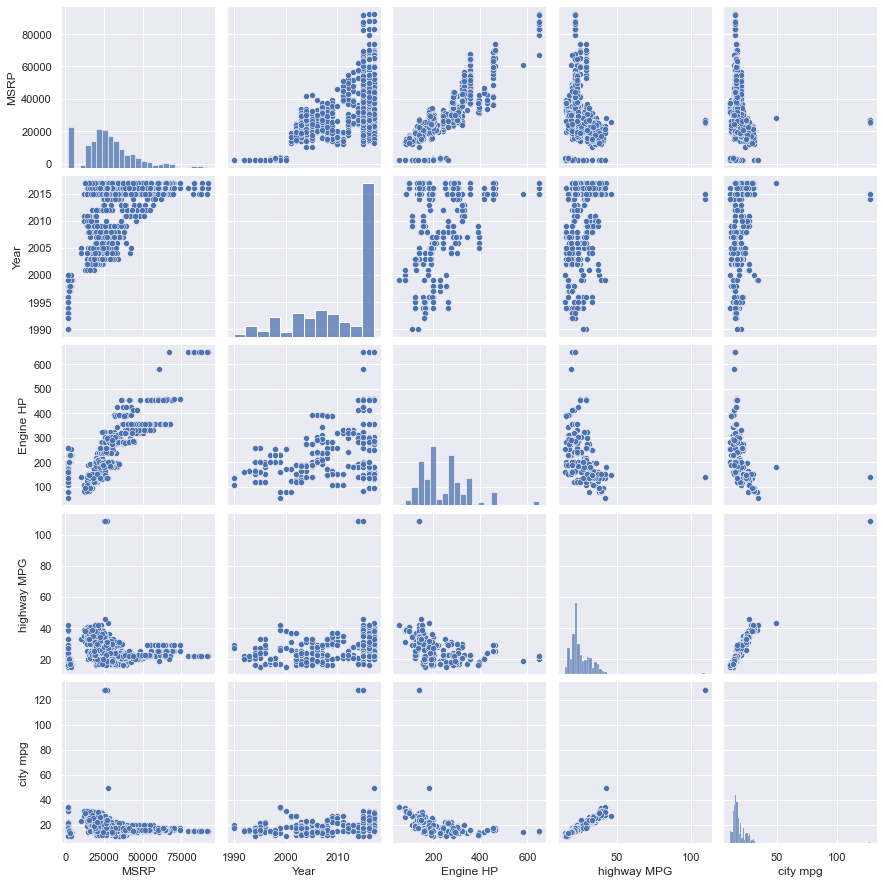

In [76]:
sb.pairplot(data = chevrolet_train)

In [77]:
chevrolet_train2= pd.DataFrame(chevrolet[["Engine Cylinders", "Number of Doors", "Popularity"]])
chevrolet_train2 = pd.concat([chevrolet_y_train,chevrolet_train2], axis = 1).reindex(chevrolet_y_train.index)
chevrolet_train2.corr()

,MSRP,Engine Cylinders,Number of Doors,Popularity
MSRP,1.000000,0.511388,0.047864,NaN
Engine Cylinders,0.511388,1.000000,-0.149002,NaN
Number of Doors,0.047864,-0.149002,1.000000,NaN
Popularity,NaN,NaN,NaN,NaN


In [78]:
volks_y = pd.DataFrame(volkswagen["MSRP"])
volks_x = pd.DataFrame(volkswagen [["Year", "Engine HP", "highway MPG","city mpg"]])
volks_x_train, volks_x_test,volks_y_train, volks_y_test = train_test_split(volks_x, volks_y, test_size = 0.2)
volks_train = pd.concat([volks_y_train, volks_x_train], axis = 1).reindex(volks_y_train.index)
volks_z= pd.DataFrame(volkswagen[["Engine Cylinders", "Number of Doors", "Popularity"]])
volks_train.corr()

,MSRP,Year,Engine HP,highway MPG,city mpg
MSRP,1.000000,0.347655,0.812371,-0.137307,-0.087938
Year,0.347655,1.000000,0.273224,0.373760,0.241470
Engine HP,0.812371,0.273224,1.000000,-0.361048,-0.297866
highway MPG,-0.137307,0.373760,-0.361048,1.000000,0.930852
city mpg,-0.087938,0.241470,-0.297866,0.930852,1.000000


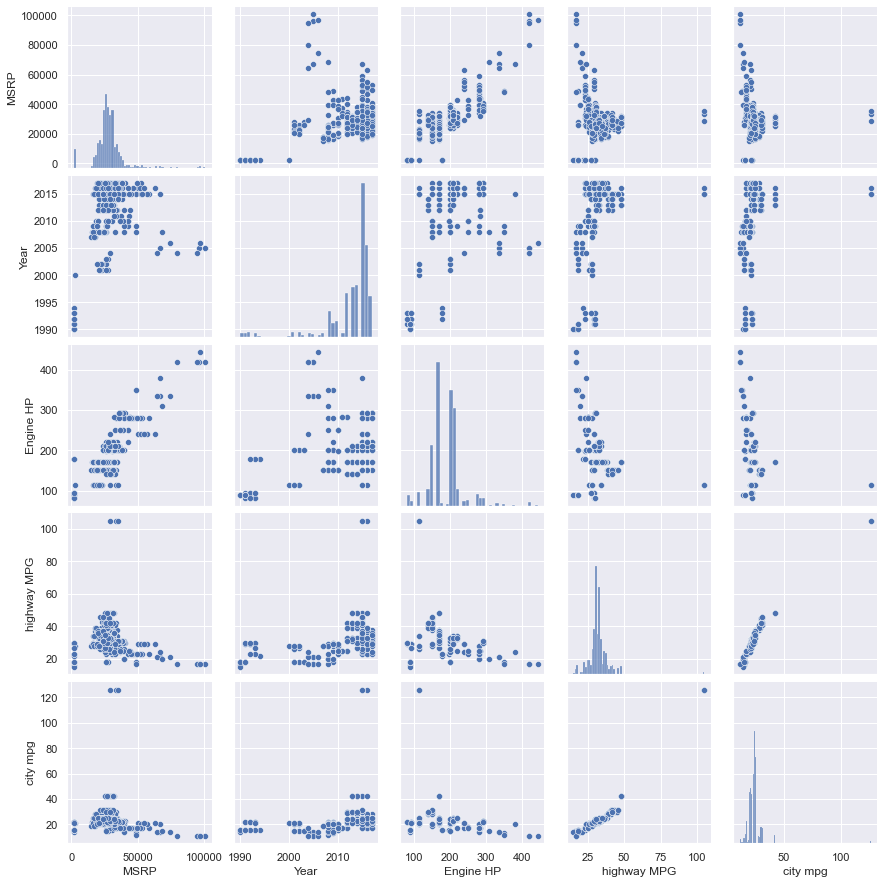

In [79]:
sb.pairplot(data = volks_train)

In [80]:
volks_train2 =  pd.concat([volks_y_train, volks_z], axis = 1).reindex(volks_y_train.index)
volks_train2.corr()

,MSRP,Engine Cylinders,Number of Doors,Popularity
MSRP,1.000000,0.614629,0.228888,NaN
Engine Cylinders,0.614629,1.000000,0.107185,NaN
Number of Doors,0.228888,0.107185,1.000000,NaN
Popularity,NaN,NaN,NaN,NaN


In [81]:
ford=ford.dropna()
ford_y = pd.DataFrame(ford["MSRP"])
ford_x = pd.DataFrame(ford [["Year", "Engine HP", "highway MPG","city mpg"]])
ford_x_train, ford_x_test,ford_y_train, ford_y_test = train_test_split(ford_x, ford_y, test_size = 0.2)
ford_train = pd.concat([ford_y_train, ford_x_train], axis = 1).reindex(ford_y_train.index)
ford_z= pd.DataFrame(ford[["Engine Cylinders", "Number of Doors", "Popularity"]])
ford_train2 =  pd.concat([ford_y_train, ford_z], axis = 1).reindex(ford_y_train.index)
ford_train.corr()

,MSRP,Year,Engine HP,highway MPG,city mpg
MSRP,1.000000,0.716059,0.769569,-0.056043,-0.070617
Year,0.716059,1.000000,0.518177,0.274308,0.220589
Engine HP,0.769569,0.518177,1.000000,-0.313489,-0.352221
highway MPG,-0.056043,0.274308,-0.313489,1.000000,0.902736
city mpg,-0.070617,0.220589,-0.352221,0.902736,1.000000


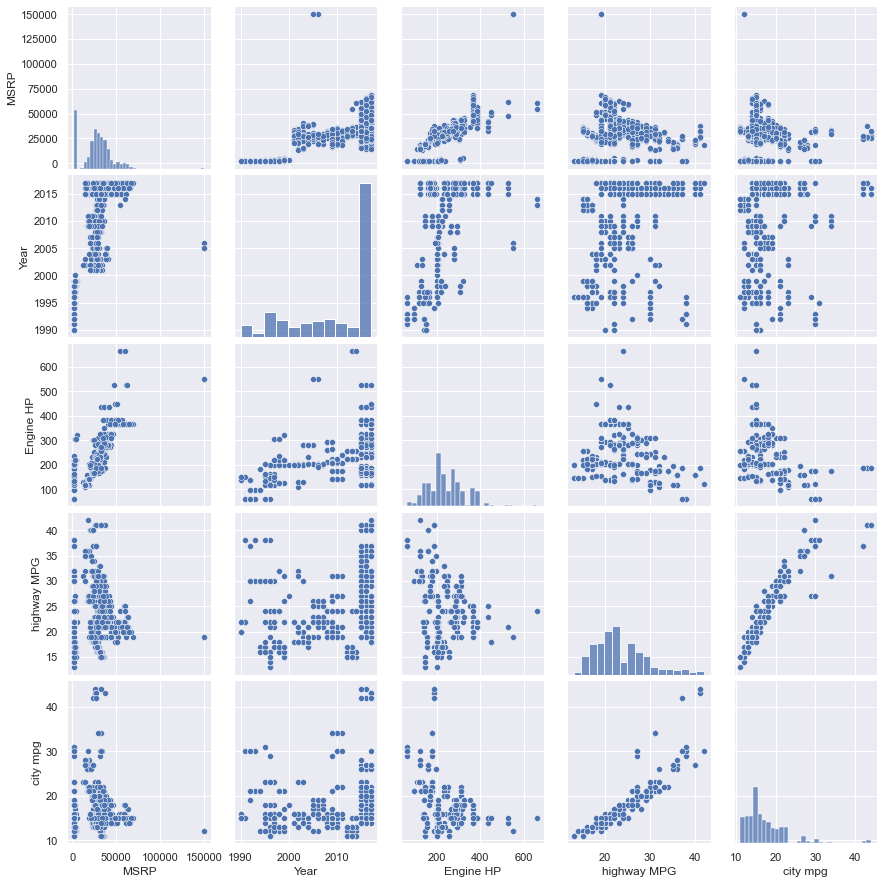

In [82]:
sb.pairplot(data = ford_train)

In [83]:
ford_train2.corr()

,MSRP,Engine Cylinders,Number of Doors,Popularity
MSRP,1.000000,0.097786,0.277175,NaN
Engine Cylinders,0.097786,1.000000,-0.204565,NaN
Number of Doors,0.277175,-0.204565,1.000000,NaN
Popularity,NaN,NaN,NaN,NaN


In [84]:
toyota=toyota.dropna()
toyota_y = pd.DataFrame(toyota["MSRP"])
toyota_x = pd.DataFrame(toyota [["Year", "Engine HP", "highway MPG","city mpg"]])
toyota_x_train, toyota_x_test,toyota_y_train, toyota_y_test = train_test_split(toyota_x, toyota_y, test_size = 0.2)
toyota_train = pd.concat([toyota_y_train, toyota_x_train], axis = 1).reindex(toyota_y_train.index)
toyota_z= pd.DataFrame(toyota[["Engine Cylinders", "Number of Doors", "Popularity"]])
toyota_train2 =  pd.concat([toyota_y_train, toyota_z], axis = 1).reindex(toyota_y_train.index)
toyota_train.corr()

,MSRP,Year,Engine HP,highway MPG,city mpg
MSRP,1.000000,0.726815,0.743962,-0.308771,-0.241809
Year,0.726815,1.000000,0.433285,0.074856,0.106747
Engine HP,0.743962,0.433285,1.000000,-0.725996,-0.642187
highway MPG,-0.308771,0.074856,-0.725996,1.000000,0.935298
city mpg,-0.241809,0.106747,-0.642187,0.935298,1.000000


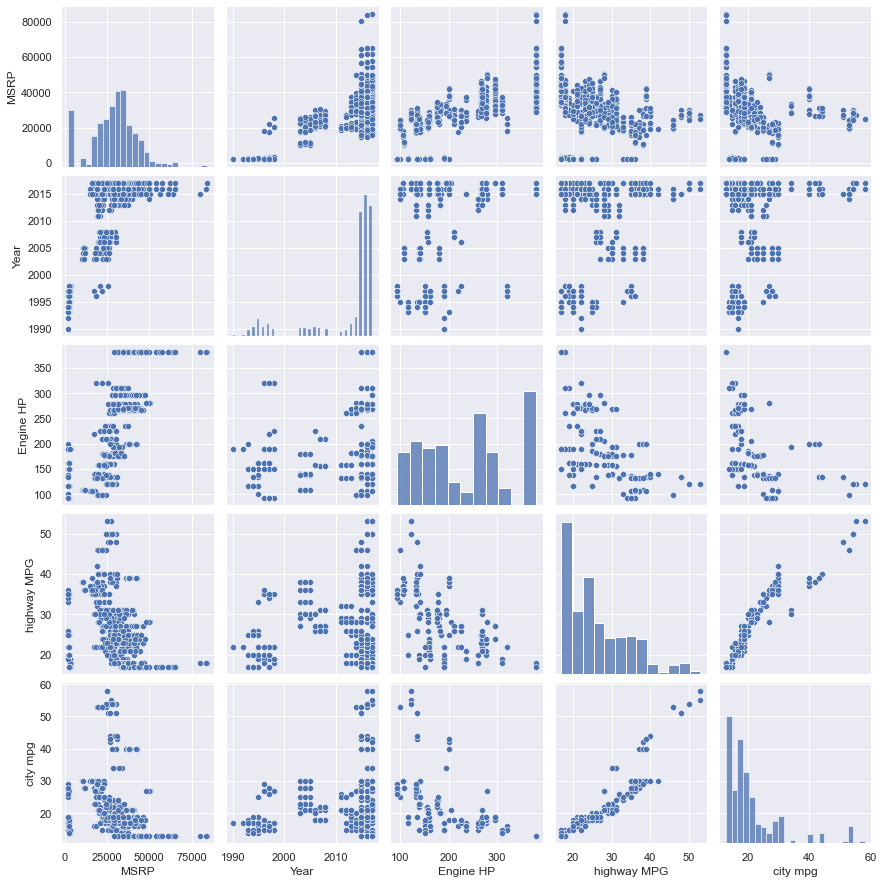

In [85]:
sb.pairplot(data = toyota_train)

In [86]:
toyota_train2.corr()

,MSRP,Engine Cylinders,Number of Doors,Popularity
MSRP,1.000000,0.614364,0.580868,NaN
Engine Cylinders,0.614364,1.000000,0.231416,NaN
Number of Doors,0.580868,0.231416,1.000000,NaN
Popularity,NaN,NaN,NaN,NaN


In [87]:
nissan=nissan.dropna()
nissan_y = pd.DataFrame(nissan["MSRP"])
nissan_x = pd.DataFrame(nissan [["Year", "Engine HP", "highway MPG","city mpg"]])


In [88]:
nissan_x_train, nissan_x_test,nissan_y_train, nissan_y_test = train_test_split(nissan_x, nissan_y, test_size = 0.2)
nissan_train = pd.concat([nissan_y_train, nissan_x_train], axis = 1).reindex(nissan_y_train.index)
nissan_z= pd.DataFrame(nissan[["Engine Cylinders", "Number of Doors", "Popularity"]])
nissan_train2 =  pd.concat([nissan_y_train, nissan_z], axis = 1).reindex(nissan_y_train.index)
nissan_train.corr()

,MSRP,Year,Engine HP,highway MPG,city mpg
MSRP,1.000000,0.545027,0.845476,-0.271615,-0.314880
Year,0.545027,1.000000,0.328656,0.158190,0.143442
Engine HP,0.845476,0.328656,1.000000,-0.567730,-0.640614
highway MPG,-0.271615,0.158190,-0.567730,1.000000,0.958519
city mpg,-0.314880,0.143442,-0.640614,0.958519,1.000000


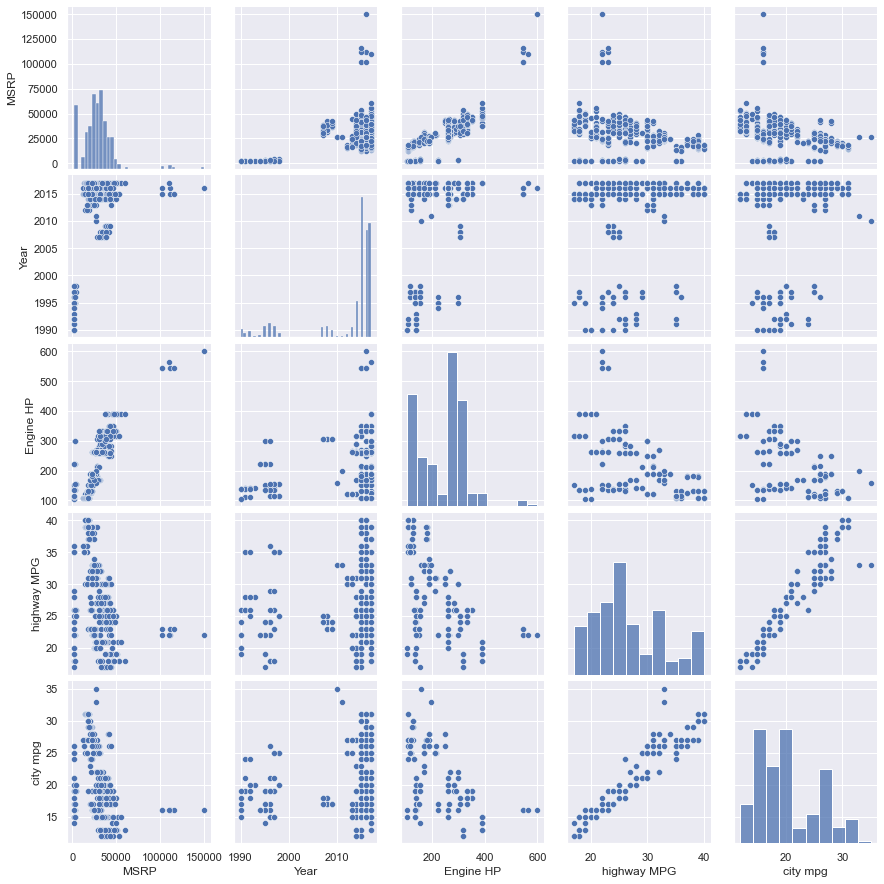

In [89]:
sb.pairplot(data = nissan_train)

In [90]:
nissan_train2.corr()

,MSRP,Engine Cylinders,Number of Doors,Popularity
MSRP,1.000000,0.549224,-0.052330,NaN
Engine Cylinders,0.549224,1.000000,-0.009165,NaN
Number of Doors,-0.052330,-0.009165,1.000000,NaN
Popularity,NaN,NaN,NaN,NaN


In [91]:
#sb.pairplot(data = nissan_train2)

In [92]:
def mean_sq_err(actual,predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) -np.array(predicted)))

Intercept of Regression 	: b =  [-1899963.09870154]
Coefficients of Regression 	: a = [[ 946.0243763   111.16339203 -198.53827853  224.78580863]]
    Predictors  Coefficients
0         Year    946.024376
1    Engine HP    111.163392
2  highway MPG   -198.538279
3     city mpg    224.785809

Goodness of Fit of Model 	Train Dataset
Explained Variance(train) (R^2) 	: 0.842439781025482
Mean Squared Error (MSE) 	: 44740947.69700697
Explained Variance(test),prediction accuracy (R^2) 	: 86.15981602643149

Prediction accuracy 	Test Dataset
Explained Variance (R^2) 	: 0.8615981602643148
Mean Squared Error (MSE) 	: 50111782.906313755



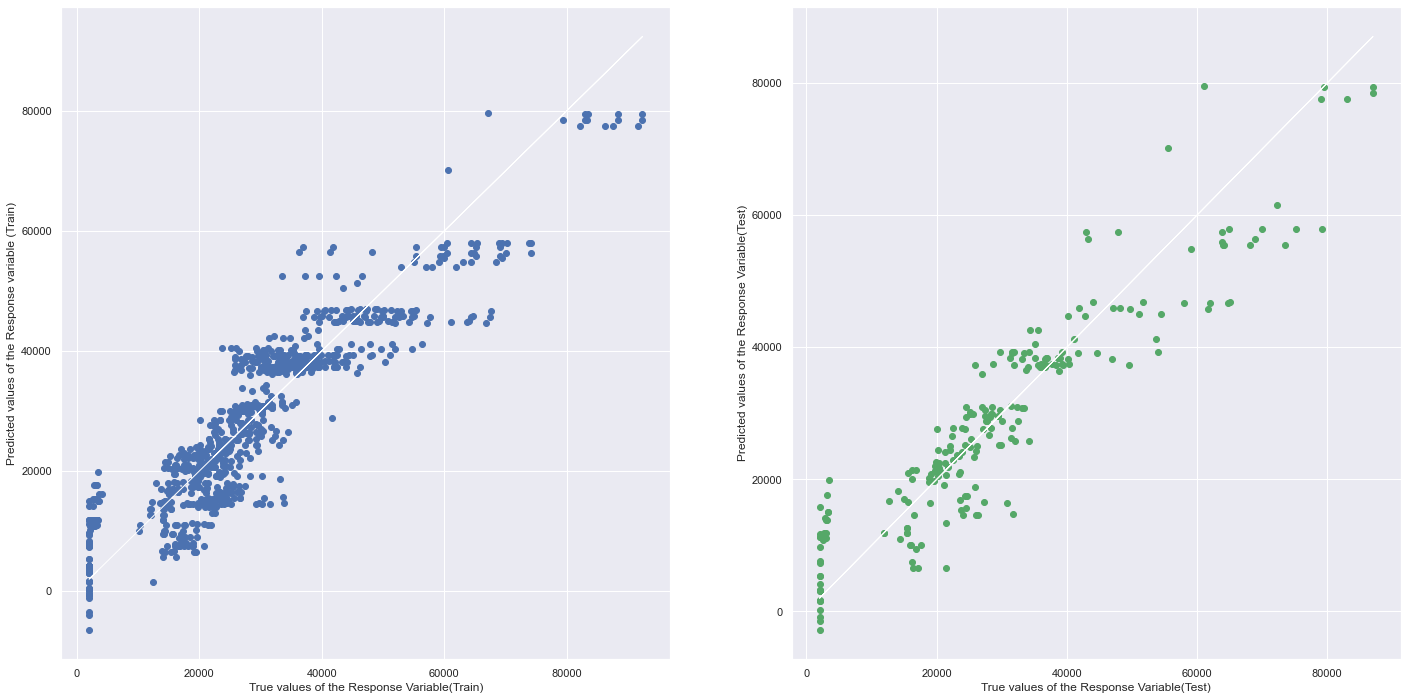

In [93]:
linreg = LinearRegression()  # create the linear regression object
linreg.fit(chevrolet_x_train,chevrolet_y_train)  # train the linear regression model
# Coefficients of the Linear Regression Line
print("Intercept of Regression \t: b = ",linreg.intercept_)
print("Coefficients of Regression \t: a =",linreg.coef_)
print(pd.DataFrame(list(zip(chevrolet_x_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Total values corresponding to HP
chevrolet_y_train_pred = linreg.predict(chevrolet_x_train)
chevrolet_y_test_pred = linreg.predict(chevrolet_x_test)

# Check the Goodness of Fit on train data
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance(train) (R^2) \t:",linreg.score(chevrolet_x_train,chevrolet_y_train))
print("Mean Squared Error (MSE) \t:",mean_squared_error(chevrolet_y_train,chevrolet_y_train_pred))
print("Explained Variance(test),prediction accuracy (R^2) \t:",100*linreg.score(chevrolet_x_test,chevrolet_y_test))
print()
# Check the Goodness of Fit (on Test Data)
print("Prediction accuracy \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(chevrolet_x_test,chevrolet_y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(chevrolet_y_test, chevrolet_y_test_pred))
print()

# Plot the Predictions vs the True Values
f, axes = plt.subplots(1,2, figsize=(24,12))
axes[0].scatter(chevrolet_y_train,chevrolet_y_train_pred,color = 'b')
axes[0].plot(chevrolet_y_train,chevrolet_y_train,'w-',linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable(Train)")
axes[0].set_ylabel("Predicted values of the Response variable (Train)")
axes[1].scatter(chevrolet_y_test,chevrolet_y_test_pred,color="g")
axes[1].plot(chevrolet_y_test,chevrolet_y_test,'w-',linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable(Test)")
axes[1].set_ylabel("Predicted values of the Response Variable(Test)")
plt.show()

Intercept of Regression 	: b =  [-365087.06833773]
Coefficients of Regression 	: a = [[175.41892861 188.5290065   16.19005561 165.19166698]]
    Predictors  Coefficients
0         Year    175.418929
1    Engine HP    188.529007
2  highway MPG     16.190056
3     city mpg    165.191667

Goodness of Fit of Model 	Train Dataset
Explained Variance(train) (R^2) 	: 0.6922335530659763
Mean Squared Error (MSE) 	: 33638959.1946027
Explained Variance(test),prediction accuracy (R^2) 	: 68.5316519980027

Prediction accuracy 	Test Dataset
Explained Variance (R^2) 	: 0.6853165199800271
Mean Squared Error (MSE) 	: 42297764.04953488



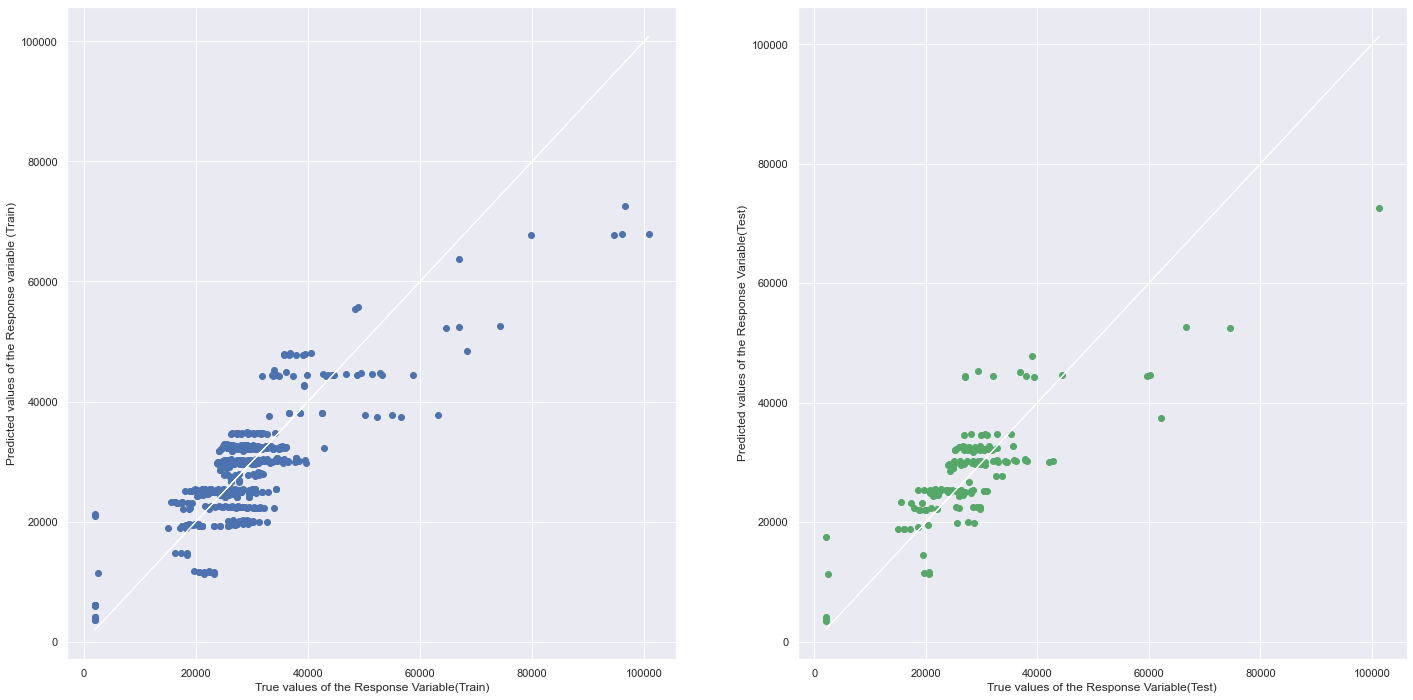

In [94]:
linreg = LinearRegression()  # create the linear regression object
linreg.fit(volks_x_train,volks_y_train)  # train the linear regression model
# Coefficients of the Linear Regression Line
print("Intercept of Regression \t: b = ",linreg.intercept_)
print("Coefficients of Regression \t: a =",linreg.coef_)
print(pd.DataFrame(list(zip(volks_x_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Total values corresponding to HP
volks_y_train_pred = linreg.predict(volks_x_train)
volks_y_test_pred = linreg.predict(volks_x_test)

# Check the Goodness of Fit on train data
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance(train) (R^2) \t:",linreg.score(volks_x_train,volks_y_train))
print("Mean Squared Error (MSE) \t:",mean_squared_error(volks_y_train,volks_y_train_pred))
print("Explained Variance(test),prediction accuracy (R^2) \t:",100*linreg.score(volks_x_test,volks_y_test))
print()
# Check the Goodness of Fit (on Test Data)
print("Prediction accuracy \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(volks_x_test,volks_y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(volks_y_test, volks_y_test_pred))
print()

# Plot the Predictions vs the True Values
f, axes = plt.subplots(1,2, figsize=(24,12))
axes[0].scatter(volks_y_train,volks_y_train_pred,color = 'b')
axes[0].plot(volks_y_train,volks_y_train,'w-',linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable(Train)")
axes[0].set_ylabel("Predicted values of the Response variable (Train)")
axes[1].scatter(volks_y_test,volks_y_test_pred,color="g")
axes[1].plot(volks_y_test,volks_y_test,'w-',linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable(Test)")
axes[1].set_ylabel("Predicted values of the Response Variable(Test)")
plt.show()

Intercept of Regression 	: b =  [-1776894.06909729]
Coefficients of Regression 	: a = [[ 885.04187434  110.94264745 -425.51048285  506.33739982]]
    Predictors  Coefficients
0         Year    885.041874
1    Engine HP    110.942647
2  highway MPG   -425.510483
3     city mpg    506.337400

Goodness of Fit of Model 	Train Dataset
Explained Variance(train) (R^2) 	: 0.7346623506924055
Mean Squared Error (MSE) 	: 75406703.96857938
Explained Variance(test),prediction accuracy (R^2) 	: 70.42607931417

Prediction accuracy 	Test Dataset
Explained Variance (R^2) 	: 0.7042607931417
Mean Squared Error (MSE) 	: 61642080.39677496



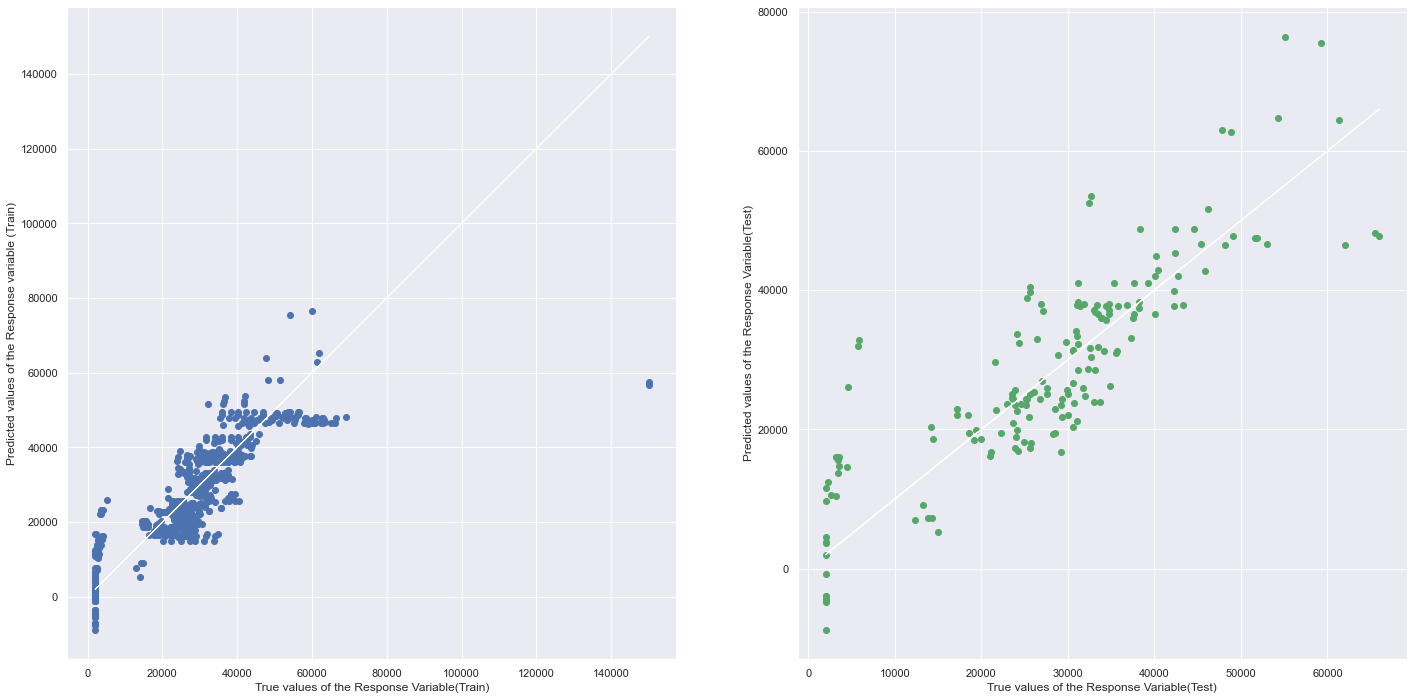

In [95]:
linreg = LinearRegression()  # create the linear regression object
linreg.fit(ford_x_train,ford_y_train)  # train the linear regression model
# Coefficients of the Linear Regression Line
print("Intercept of Regression \t: b = ",linreg.intercept_)
print("Coefficients of Regression \t: a =",linreg.coef_)
print(pd.DataFrame(list(zip(ford_x_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Total values corresponding to HP
ford_y_train_pred = linreg.predict(ford_x_train)
ford_y_test_pred = linreg.predict(ford_x_test)

# Check the Goodness of Fit on train data
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance(train) (R^2) \t:",linreg.score(ford_x_train,ford_y_train))
print("Mean Squared Error (MSE) \t:",mean_squared_error(ford_y_train,ford_y_train_pred))
print("Explained Variance(test),prediction accuracy (R^2) \t:",100*linreg.score(ford_x_test,ford_y_test)) 
print()
# Check the Goodness of Fit (on Test Data)
print("Prediction accuracy \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(ford_x_test, ford_y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(ford_y_test, ford_y_test_pred))
print()

# Plot the Predictions vs the True Values
f, axes = plt.subplots(1,2, figsize=(24,12))
axes[0].scatter(ford_y_train,ford_y_train_pred,color = 'b')
axes[0].plot(ford_y_train,ford_y_train,'w-',linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable(Train)")
axes[0].set_ylabel("Predicted values of the Response variable (Train)")
axes[1].scatter(ford_y_test,ford_y_test_pred,color="g")
axes[1].plot(ford_y_test,ford_y_test,'w-',linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable(Test)")
axes[1].set_ylabel("Predicted values of the Response Variable(Test)")
plt.show()

Intercept of Regression 	: b =  [-1729444.91192951]
Coefficients of Regression 	: a = [[860.38521331  92.87361427 120.9067652   82.21694155]]
    Predictors  Coefficients
0         Year    860.385213
1    Engine HP     92.873614
2  highway MPG    120.906765
3     city mpg     82.216942

Goodness of Fit of Model 	Train Dataset
Explained Variance(train) (R^2) 	: 0.7601844228407397
Mean Squared Error (MSE) 	: 44289727.037072875
Explained Variance(test),prediction accuracy (R^2) 	: 78.26495799719922

Prediction accuracy 	Test Dataset
Explained Variance (R^2) 	: 0.7826495799719921
Mean Squared Error (MSE) 	: 33812460.81971869



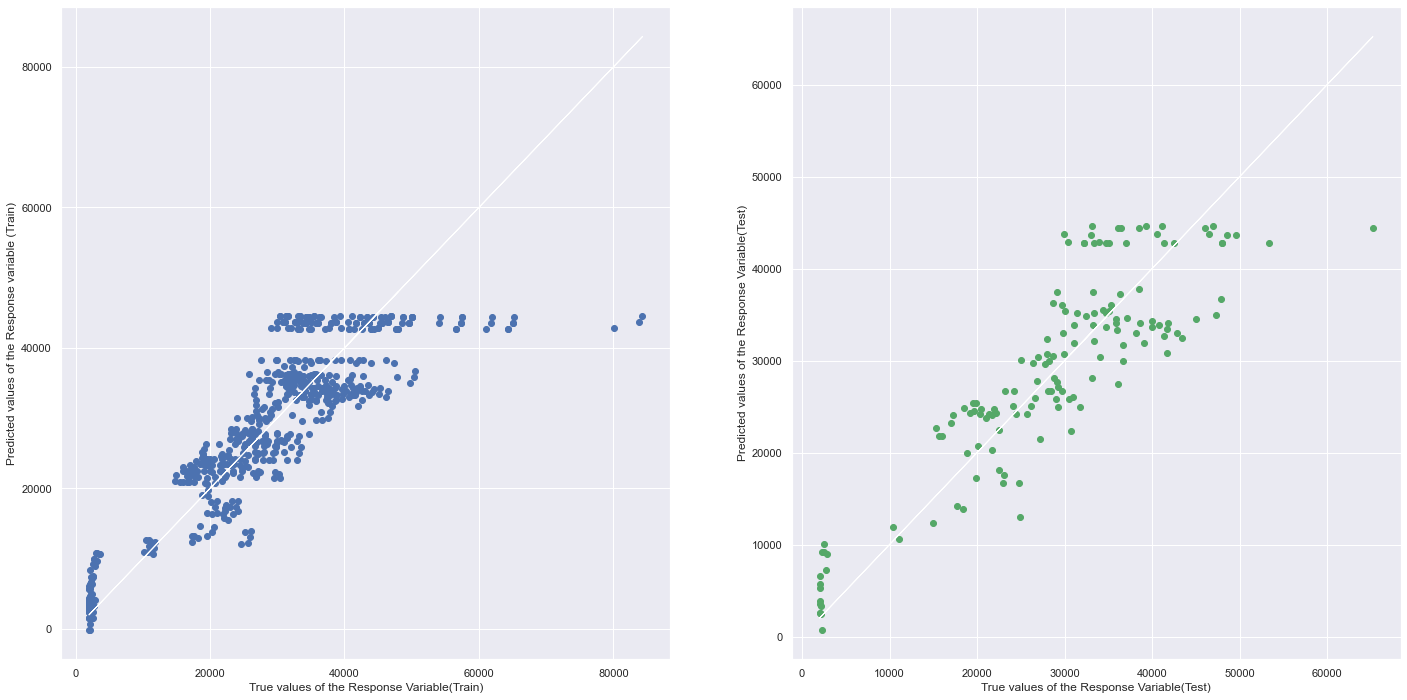

In [96]:
linreg = LinearRegression()  # create the linear regression object
linreg.fit(toyota_x_train,toyota_y_train)  # train the linear regression model
# Coefficients of the Linear Regression Line
print("Intercept of Regression \t: b = ",linreg.intercept_)
print("Coefficients of Regression \t: a =",linreg.coef_)
print(pd.DataFrame(list(zip(toyota_x_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Total values corresponding to HP
toyota_y_train_pred = linreg.predict(toyota_x_train)
toyota_y_test_pred = linreg.predict(toyota_x_test)

# Check the Goodness of Fit on train data
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance(train) (R^2) \t:",linreg.score(toyota_x_train,toyota_y_train))
print("Mean Squared Error (MSE) \t:",mean_squared_error(toyota_y_train,toyota_y_train_pred))
print("Explained Variance(test),prediction accuracy (R^2) \t:",100*linreg.score(toyota_x_test,toyota_y_test)) 
print()
# Check the Goodness of Fit (on Test Data)
print("Prediction accuracy \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(toyota_x_test, toyota_y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(toyota_y_test, toyota_y_test_pred))
print()

# Plot the Predictions vs the True Values
f, axes = plt.subplots(1,2, figsize=(24,12))
axes[0].scatter(toyota_y_train,toyota_y_train_pred,color = 'b')
axes[0].plot(toyota_y_train,toyota_y_train,'w-',linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable(Train)")
axes[0].set_ylabel("Predicted values of the Response variable (Train)")
axes[1].scatter(toyota_y_test,toyota_y_test_pred,color="g")
axes[1].plot(toyota_y_test,toyota_y_test,'w-',linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable(Test)")
axes[1].set_ylabel("Predicted values of the Response Variable(Test)")
plt.show()

Intercept of Regression 	: b =  [-919562.64300057]
Coefficients of Regression 	: a = [[ 441.14624042  186.40649878 -636.01764753 1621.9737253 ]]
    Predictors  Coefficients
0         Year    441.146240
1    Engine HP    186.406499
2  highway MPG   -636.017648
3     city mpg   1621.973725

Goodness of Fit of Model 	Train Dataset
Explained Variance(train) (R^2) 	: 0.8314740587292236
Mean Squared Error (MSE) 	: 47694354.853158474
Explained Variance(test),prediction accuracy (R^2) 	: 77.3539380668736

Prediction accuracy 	Test Dataset
Explained Variance (R^2) 	: 0.773539380668736
Mean Squared Error (MSE) 	: 73625275.75329629



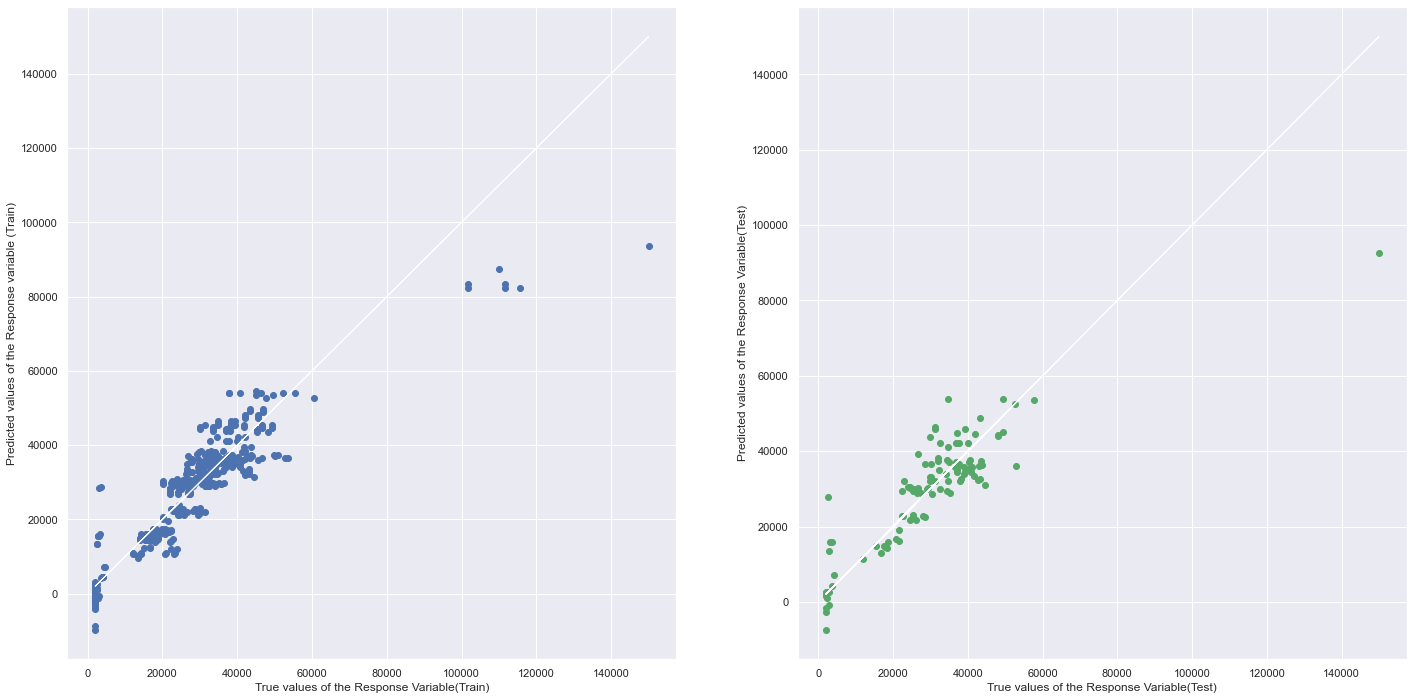

In [97]:
linreg = LinearRegression()  # create the linear regression object
linreg.fit(nissan_x_train,nissan_y_train)  # train the linear regression model
# Coefficients of the Linear Regression Line
print("Intercept of Regression \t: b = ",linreg.intercept_)
print("Coefficients of Regression \t: a =",linreg.coef_)
print(pd.DataFrame(list(zip(nissan_x_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Total values corresponding to HP
nissan_y_train_pred = linreg.predict(nissan_x_train)
nissan_y_test_pred = linreg.predict(nissan_x_test)

# Check the Goodness of Fit on train data
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance(train) (R^2) \t:",linreg.score(nissan_x_train,nissan_y_train))
print("Mean Squared Error (MSE) \t:",mean_squared_error(nissan_y_train,nissan_y_train_pred))
print("Explained Variance(test),prediction accuracy (R^2) \t:",100*linreg.score(nissan_x_test,nissan_y_test)) 
print()
# Check the Goodness of Fit (on Test Data)
print("Prediction accuracy \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(nissan_x_test, nissan_y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(nissan_y_test, nissan_y_test_pred))
print()

# Plot the Predictions vs the True Values
f, axes = plt.subplots(1,2, figsize=(24,12))
axes[0].scatter(nissan_y_train,nissan_y_train_pred,color = 'b')
axes[0].plot(nissan_y_train,nissan_y_train,'w-',linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable(Train)")
axes[0].set_ylabel("Predicted values of the Response variable (Train)")
axes[1].scatter(nissan_y_test,nissan_y_test_pred,color="g")
axes[1].plot(nissan_y_test,nissan_y_test,'w-',linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable(Test)")
axes[1].set_ylabel("Predicted values of the Response Variable(Test)")
plt.show()